In [23]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pandas.plotting import parallel_coordinates
import matplotlib.patches as patches
import matplotlib.cm as cm
from math import pi

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_columns', None)

In [31]:
df= pd.read_csv('/kaggle/input/datasets/gauravkumar2525/zomato-restaurant-dataset/enhanced_zomato_dataset_clean.csv')
df.head()

,Restaurant_Name,Dining_Rating,Delivery_Rating,Dining_Votes,Delivery_Votes,Cuisine,Place_Name,City,Item_Name,Best_Seller,Votes,Prices,Average_Rating,Total_Votes,Price_per_Vote,Log_Price,Is_Bestseller,Restaurant_Popularity,Avg_Rating_Restaurant,Avg_Price_Restaurant,Avg_Rating_Cuisine,Avg_Price_Cuisine,Avg_Rating_City,Avg_Price_City,Is_Highly_Rated,Is_Expensive
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,BESTSELLER,84,249.0,4.05,39,2.929412,5.521461,1,46,4.05,171.347826,3.81868,255.954894,3.939031,245.130482,1,0
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,BESTSELLER,45,129.0,4.05,39,2.804348,4.867534,1,46,4.05,171.347826,3.81868,255.954894,3.939031,245.130482,1,0
2,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,NONE,39,189.0,4.05,39,4.725000,5.247024,1,46,4.05,171.347826,3.81868,255.954894,3.939031,245.130482,1,0
3,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken BBQ Salad,BESTSELLER,43,189.0,4.05,39,4.295455,5.247024,1,46,4.05,171.347826,3.81868,255.954894,3.939031,245.130482,1,0
4,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Doner Wrap Combo,MUST TRY,31,205.0,4.05,39,6.406250,5.327876,1,46,4.05,171.347826,3.81868,255.954894,3.939031,245.130482,1,0


In [34]:
df.shape

(123657, 26)

In [35]:
df.info

<bound method DataFrame.info of               Restaurant_Name  Dining_Rating  Delivery_Rating  Dining_Votes  \
0                  Doner King            3.9              4.2            39   
1                  Doner King            3.9              4.2            39   
2                  Doner King            3.9              4.2            39   
3                  Doner King            3.9              4.2            39   
4                  Doner King            3.9              4.2            39   
...                       ...            ...              ...           ...   
123652  Ariena Boutique Hotel            3.9              4.2            13   
123653  Ariena Boutique Hotel            3.9              4.2            13   
123654  Ariena Boutique Hotel            3.9              4.2            13   
123655  Ariena Boutique Hotel            3.9              4.2            13   
123656  Ariena Boutique Hotel            3.9              4.2            13   

        Delivery_Vo

In [38]:
df.describe()

,Dining_Rating,Delivery_Rating,Dining_Votes,Delivery_Votes,Votes,Prices,Average_Rating,Total_Votes,Price_per_Vote,Log_Price,Is_Bestseller,Restaurant_Popularity,Avg_Rating_Restaurant,Avg_Price_Restaurant,Avg_Rating_Cuisine,Avg_Price_Cuisine,Avg_Rating_City,Avg_Price_City,Is_Highly_Rated,Is_Expensive
count,123657.000000,123657.000000,123657.000000,123657.000000,123657.000000,123657.000000,123657.000000,123657.000000,123657.000000,123657.000000,123657.0,123657.000000,123657.000000,123657.000000,123657.000000,123657.000000,123657.000000,123657.000000,123657.000000,123657.000000
mean,3.822264,3.963184,152.729858,115.763725,24.666772,241.378399,3.892724,268.493583,154.707246,5.265611,1.0,304.008143,3.892724,241.378399,3.892724,241.378399,3.892724,241.378399,0.373970,0.243464
std,0.351407,0.244624,232.214061,243.970828,125.236009,192.830713,0.238449,292.811830,207.522162,0.699109,0.0,346.309371,0.229933,94.690020,0.074554,30.359509,0.025634,29.121965,0.483858,0.429174
min,2.500000,2.500000,0.000000,0.000000,0.000000,0.950000,3.000000,0.000000,0.006586,0.667829,1.0,4.000000,3.000000,35.833333,3.406122,61.428571,3.600000,194.591645,0.000000,0.000000
25%,3.700000,3.800000,0.000000,0.000000,0.000000,130.000000,3.750000,11.000000,11.000000,4.875197,1.0,125.000000,3.750000,178.460526,3.873352,212.572315,3.880503,223.676576,0.000000,0.000000
50%,3.822264,4.000000,30.000000,0.000000,0.000000,208.570000,3.911132,158.000000,95.000000,5.345058,1.0,195.000000,3.911132,230.959514,3.913401,254.565364,3.889413,235.550603,0.000000,0.000000
75%,4.000000,4.100000,217.000000,23.000000,15.000000,299.000000,4.050000,447.000000,245.000000,5.703782,1.0,318.000000,4.050000,285.146825,3.928624,255.954894,3.907014,245.130482,1.000000,0.000000
max,4.800000,4.600000,997.000000,983.000000,9750.000000,12024.000000,4.650000,1393.000000,12024.000000,9.394743,1.0,2059.000000,4.450000,1011.718750,4.250000,512.500000,4.000000,670.242424,1.000000,1.000000


In [41]:
df.isnull()

,Restaurant_Name,Dining_Rating,Delivery_Rating,Dining_Votes,Delivery_Votes,Cuisine,Place_Name,City,Item_Name,Best_Seller,Votes,Prices,Average_Rating,Total_Votes,Price_per_Vote,Log_Price,Is_Bestseller,Restaurant_Popularity,Avg_Rating_Restaurant,Avg_Price_Restaurant,Avg_Rating_Cuisine,Avg_Price_Cuisine,Avg_Rating_City,Avg_Price_City,Is_Highly_Rated,Is_Expensive
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123652,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
123653,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
123654,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
123655,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [42]:
df.duplicated().sum()

np.int64(22127)

In [43]:
df = df.drop_duplicates()

In [44]:
df.duplicated().sum()

np.int64(0)

In [46]:
df.shape

(101530, 26)

In [47]:
df.nunique()

Restaurant_Name            826
Dining_Rating               25
Delivery_Rating             19
Dining_Votes               294
Delivery_Votes             263
Cuisine                     48
Place_Name                 324
City                        17
Item_Name                55693
Best_Seller                 14
Votes                      760
Prices                    2710
Average_Rating              52
Total_Votes                450
Price_per_Vote           13496
Log_Price                 2710
Is_Bestseller                1
Restaurant_Popularity      308
Avg_Rating_Restaurant      119
Avg_Price_Restaurant       824
Avg_Rating_Cuisine          46
Avg_Price_Cuisine           48
Avg_Rating_City             17
Avg_Price_City              17
Is_Highly_Rated              2
Is_Expensive                 2
dtype: int64

In [50]:
print("Column Is_Bestseller has only 1 unique value so we drop this column")
df = df.drop(columns=['Is_Bestseller'])
df.sample()

Column Is_Bestseller has only 1 unique value so we drop this column


,Restaurant_Name,Dining_Rating,Delivery_Rating,Dining_Votes,Delivery_Votes,Cuisine,Place_Name,City,Item_Name,Best_Seller,Votes,Prices,Average_Rating,Total_Votes,Price_per_Vote,Log_Price,Restaurant_Popularity,Avg_Rating_Restaurant,Avg_Price_Restaurant,Avg_Rating_Cuisine,Avg_Price_Cuisine,Avg_Rating_City,Avg_Price_City,Is_Highly_Rated,Is_Expensive
60091,Beyondburg Inc,3.9,4.4,14,0,Continental,Palarivattom,Kochi,Asian - Slaw Burger,NEW,0,426.0,4.15,14,426.0,6.056784,60,4.15,306.483333,3.757491,349.923944,3.869203,225.95422,1,1


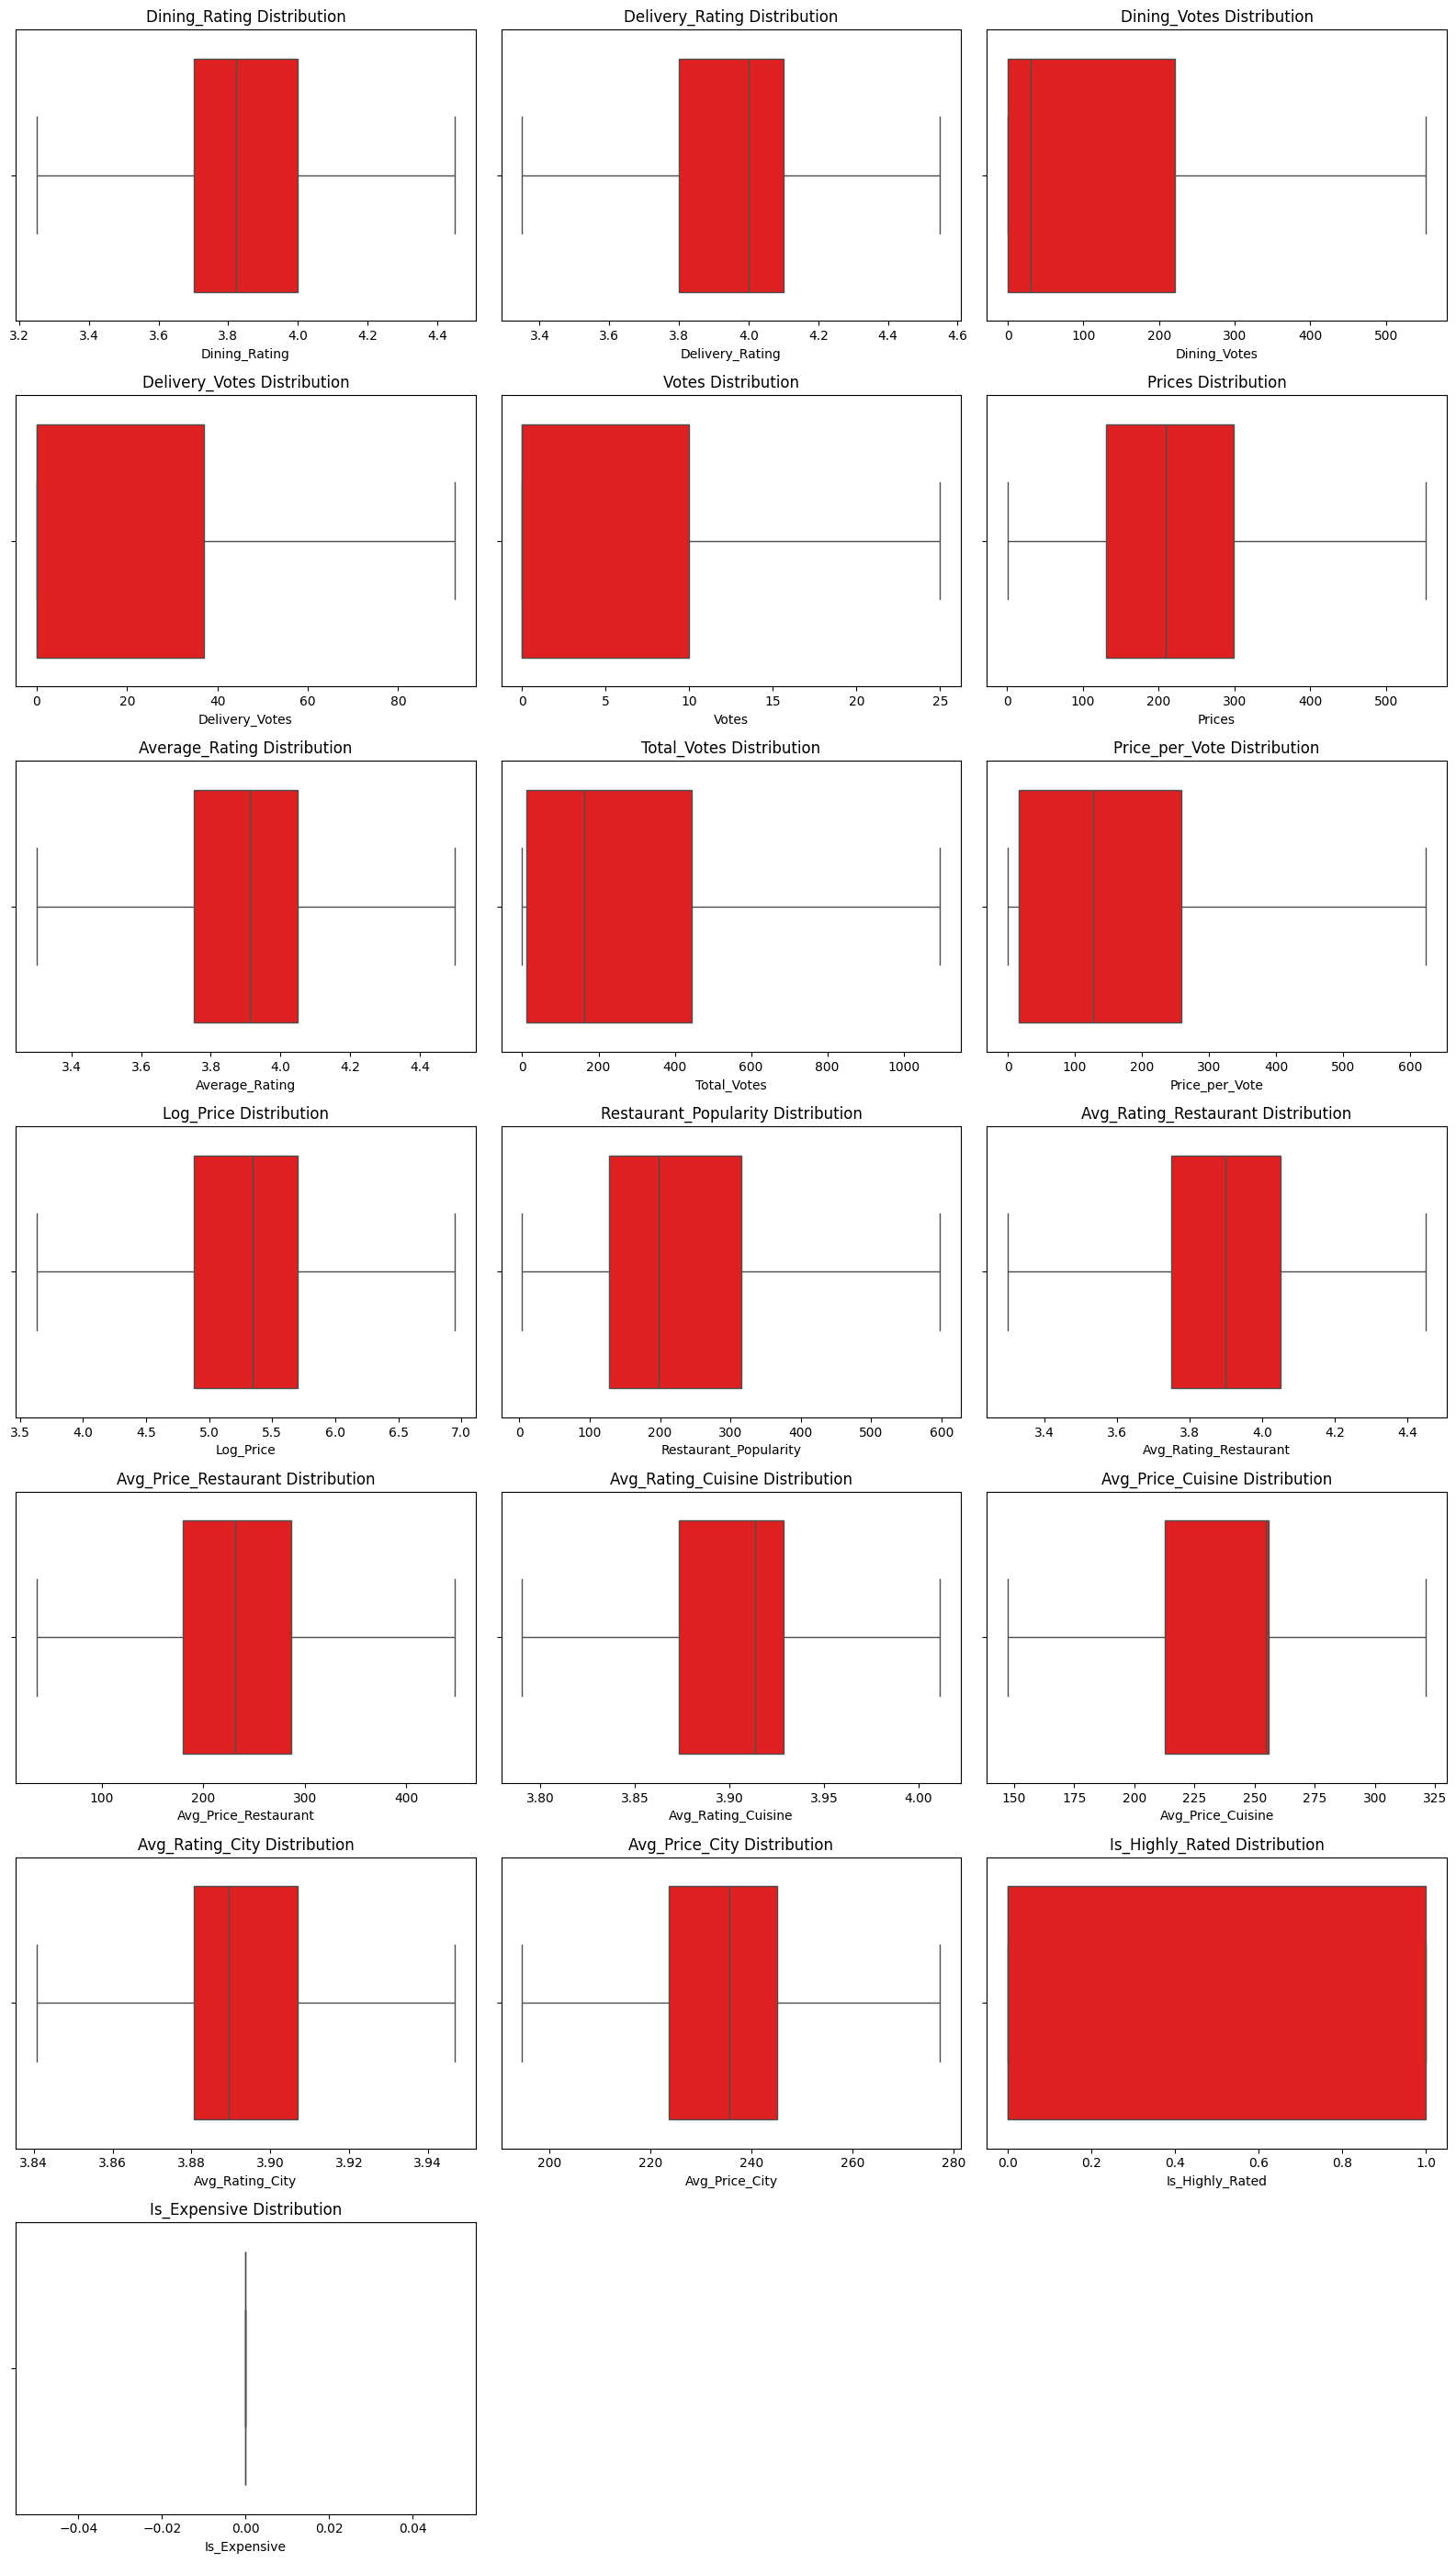

In [56]:
# Select numeric features
num_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

plots_in_row = 3
total_rows = -(-len(num_features) // plots_in_row)   # Ceiling division trick

# Create figure and axes
figure, axis_array = plt.subplots(total_rows, plots_in_row, 
                                   figsize=(16, total_rows * 4))

axis_list = axis_array.ravel()

# Generate boxplots
for idx, feature in enumerate(num_features):
    sns.boxplot(data=df, x=feature, ax=axis_list[idx], color='red')
    axis_list[idx].set_title(f'{feature} Distribution')
    axis_list[idx].grid(False)

# Remove unused subplots
for k in range(len(num_features), len(axis_list)):
    figure.delaxes(axis_list[k])

plt.tight_layout()
plt.show()


In [54]:
# Extract numeric columns
numeric_features = df.select_dtypes(include='number').columns

# Apply IQR-based capping
for feature in numeric_features:
    
    first_quartile = df[feature].quantile(0.25)
    third_quartile = df[feature].quantile(0.75)
    interquartile_range = third_quartile - first_quartile
    
    min_boundary = first_quartile - 1.5 * interquartile_range
    max_boundary = third_quartile + 1.5 * interquartile_range
    
    # Clip values within calculated boundaries
    df[feature] = df[feature].clip(lower=min_boundary, upper=max_boundary)

print("IQR-based Winsorization applied successfully ✅")
print(df.head())


IQR-based Winsorization applied successfully ✅
  Restaurant_Name  Dining_Rating  Delivery_Rating  Dining_Votes  \
0      Doner King            3.9              4.2          39.0   
1      Doner King            3.9              4.2          39.0   
2      Doner King            3.9              4.2          39.0   
3      Doner King            3.9              4.2          39.0   
4      Doner King            3.9              4.2          39.0   

   Delivery_Votes    Cuisine Place_Name        City                 Item_Name  \
0             0.0  Fast Food   Malakpet   Hyderabad       Platter Kebab Combo   
1             0.0  Fast Food   Malakpet   Hyderabad   Chicken Rumali Shawarma   
2             0.0  Fast Food   Malakpet   Hyderabad    Chicken Tandoori Salad   
3             0.0  Fast Food   Malakpet   Hyderabad         Chicken BBQ Salad   
4             0.0  Fast Food   Malakpet   Hyderabad  Special Doner Wrap Combo   

  Best_Seller  Votes  Prices  Average_Rating  Total_Votes  Pric

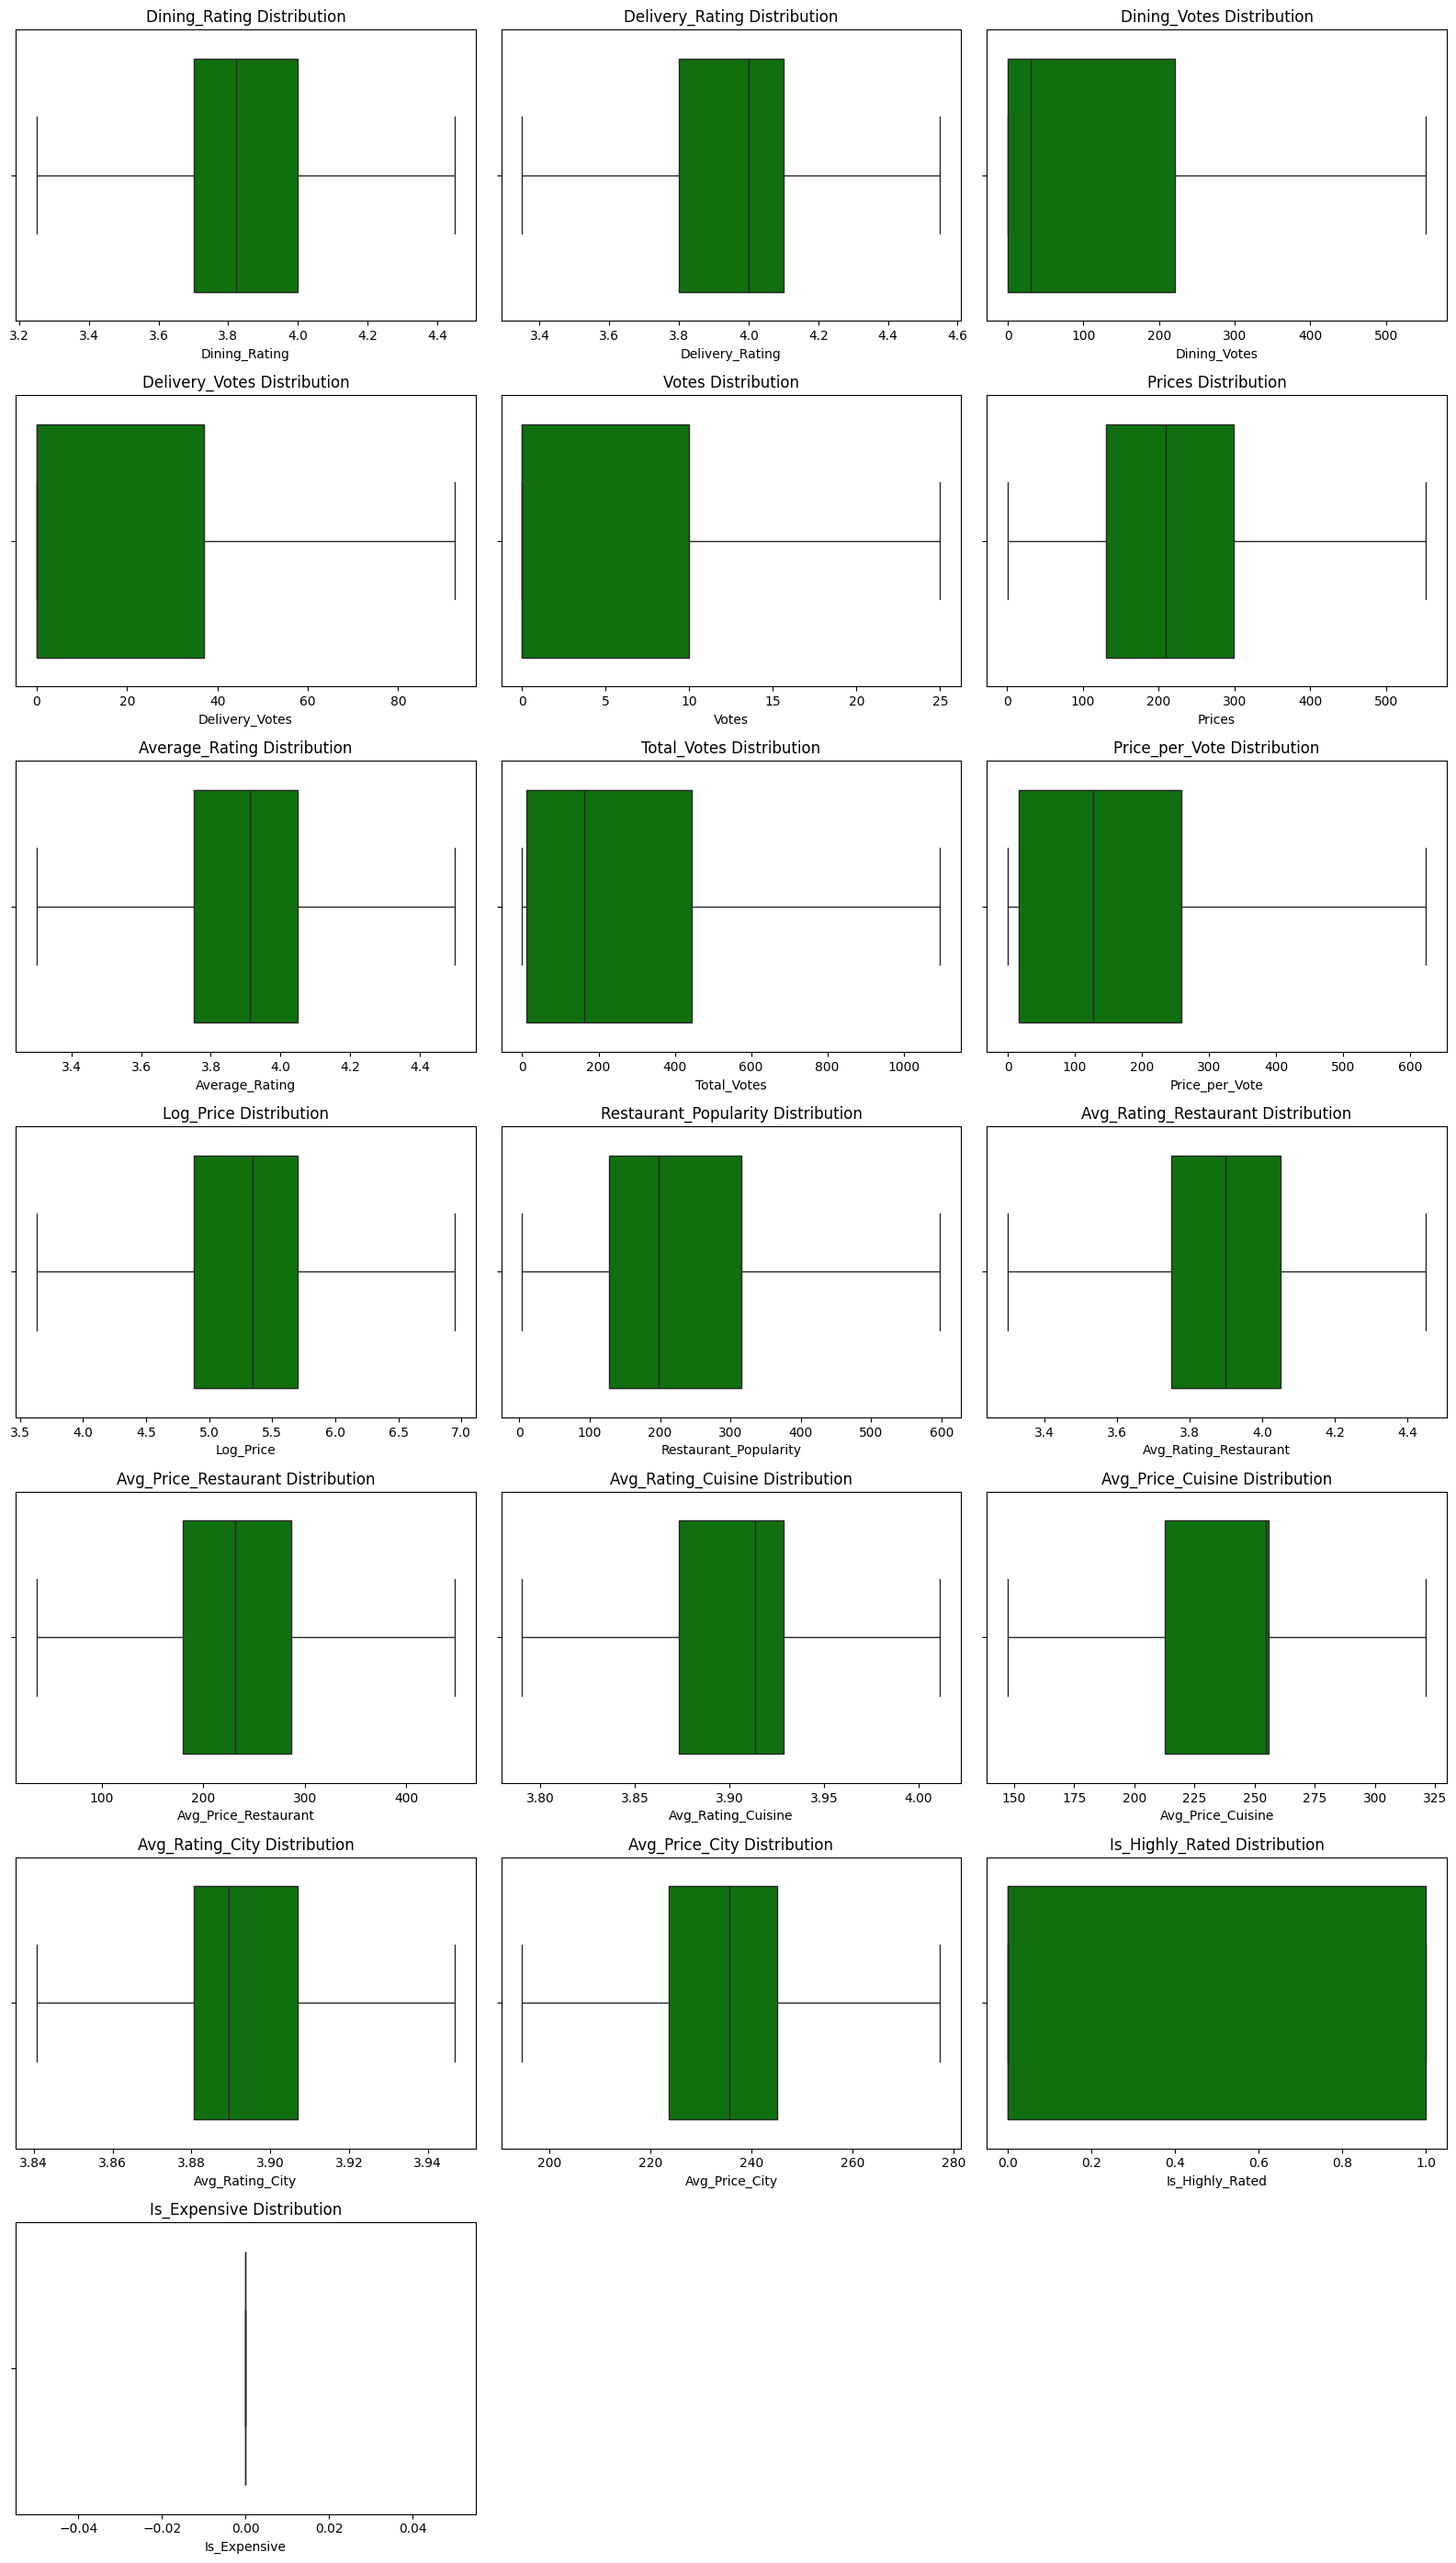

In [57]:
# Select numeric features
num_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

plots_in_row = 3
total_rows = -(-len(num_features) // plots_in_row)   # Ceiling division trick

# Create figure and axes
figure, axis_array = plt.subplots(total_rows, plots_in_row, 
                                   figsize=(16, total_rows * 4))

axis_list = axis_array.ravel()

# Generate boxplots
for idx, feature in enumerate(num_features):
    sns.boxplot(data=df, x=feature, ax=axis_list[idx], color='green')
    axis_list[idx].set_title(f'{feature} Distribution')
    axis_list[idx].grid(False)

# Remove unused subplots
for k in range(len(num_features), len(axis_list)):
    figure.delaxes(axis_list[k])

plt.tight_layout()
plt.show()

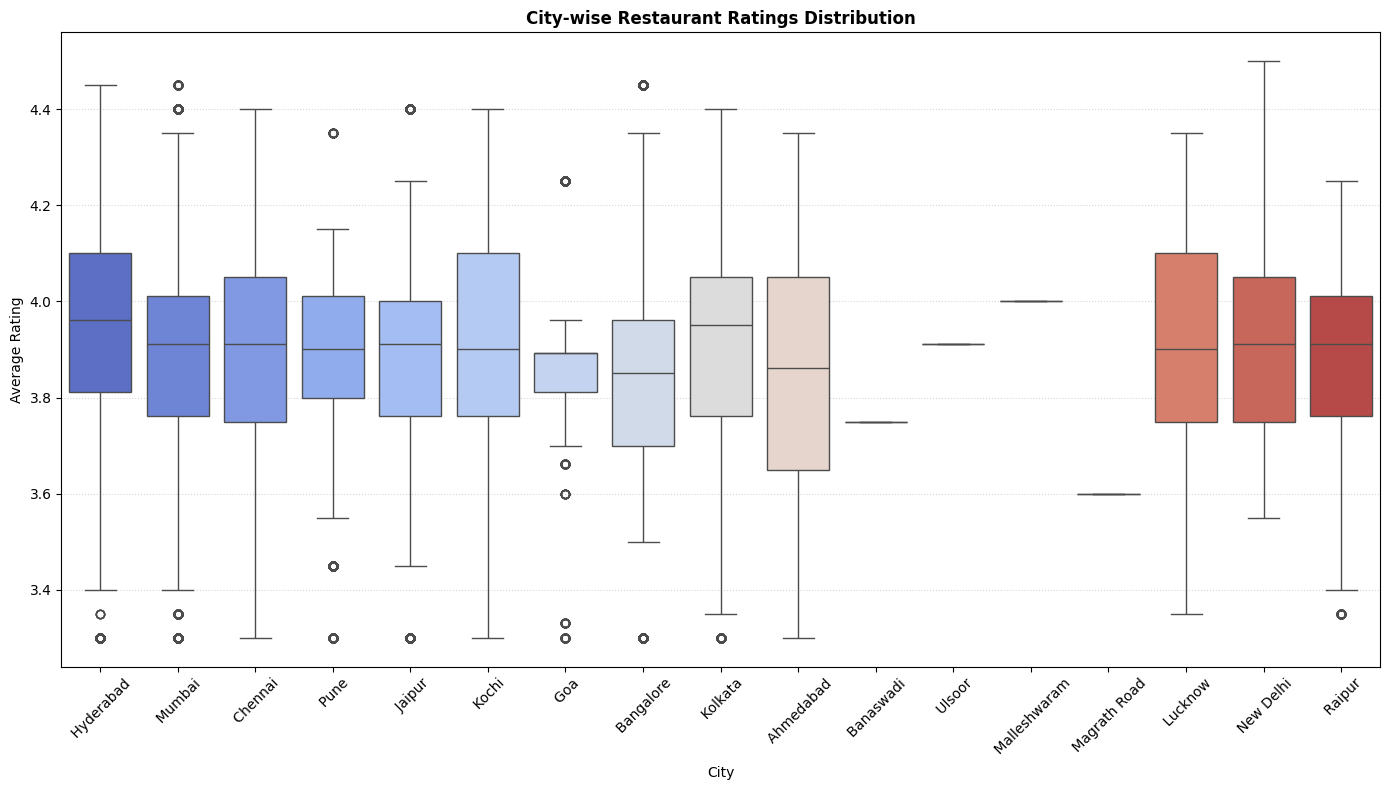

In [58]:
plt.subplots(figsize=(14, 8))

sns.boxplot(
    data=df,
    x="City",
    y="Average_Rating",
    palette="coolwarm"
)

plt.title("City-wise Restaurant Ratings Distribution", weight="bold")
plt.xlabel("City")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.grid(True, axis="y", linestyle=":", alpha=0.5)

plt.tight_layout()
plt.show()


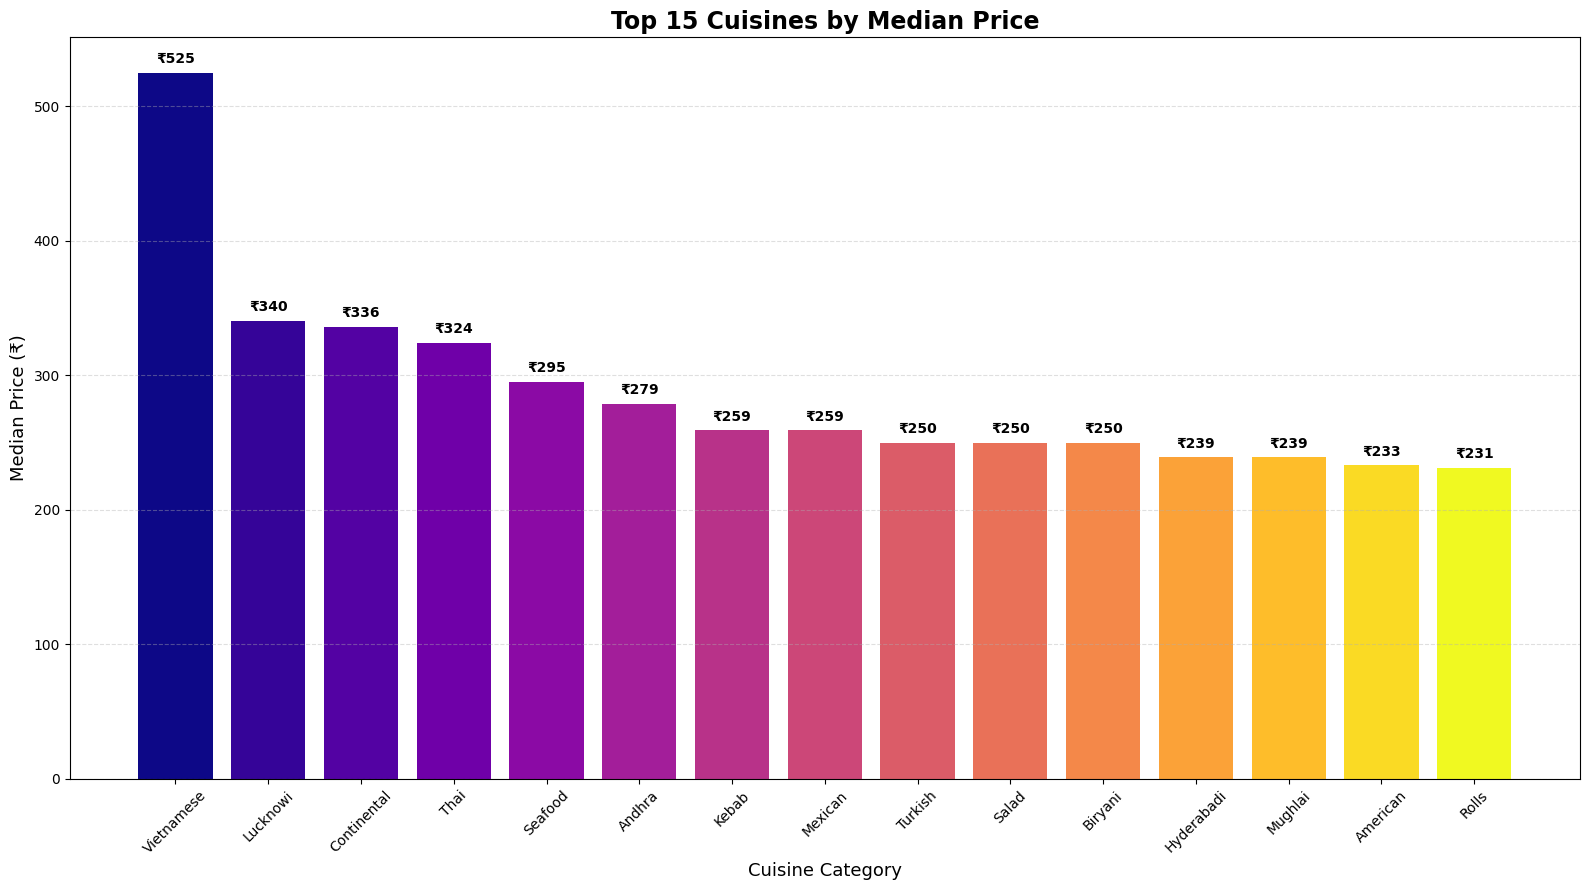

In [59]:
# Prepare data
top_cuisines = (
    df.groupby("Cuisine")["Prices"]
      .median()
      .sort_values(ascending=False)
      .head(15)
)

# Create figure and axis
fig, ax = plt.subplots(figsize=(16, 9))

# Generate color gradient
color_range = plt.cm.plasma(np.linspace(0, 1, len(top_cuisines)))

# Plot bar chart
bar_container = ax.bar(
    x=top_cuisines.index,
    height=top_cuisines.values,
    color=color_range
)

# Formatting
ax.set_title("Top 15 Cuisines by Median Price",
             fontsize=17, fontweight="bold")

ax.set_xlabel("Cuisine Category", fontsize=13)
ax.set_ylabel("Median Price (₹)", fontsize=13)

ax.tick_params(axis="x", rotation=45)
ax.grid(axis="y", linestyle="--", alpha=0.4)

# Add value labels
for bar in bar_container:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2,
            height + 5,
            f"₹{height:.0f}",
            ha="center",
            va="bottom",
            fontweight="bold")

plt.tight_layout()
plt.show()


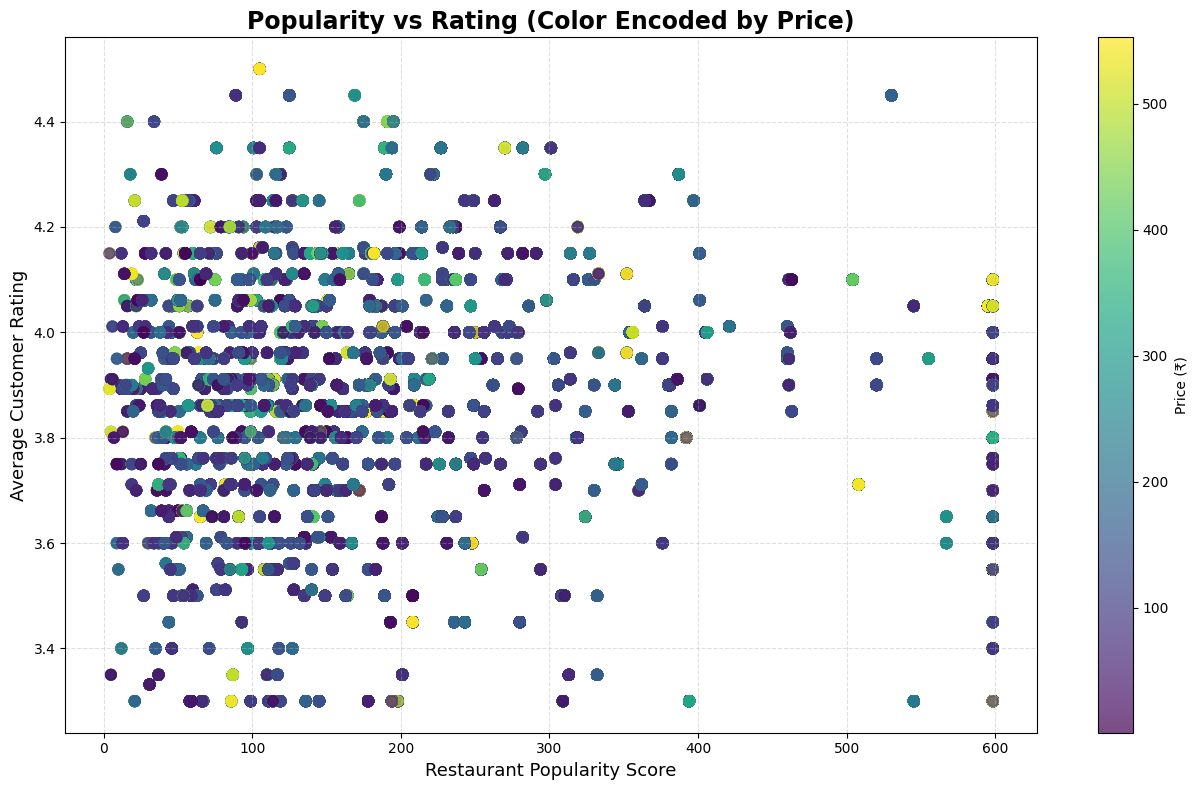

In [60]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(13, 8))

# Scatter plot
points = ax.scatter(
    df["Restaurant_Popularity"],
    df["Average_Rating"],
    c=df["Prices"],
    cmap="viridis",
    alpha=0.7,
    s=60
)

# Add colorbar
cbar = fig.colorbar(points, ax=ax)
cbar.set_label("Price (₹)")

# Labels and title
ax.set_xlabel("Restaurant Popularity Score", fontsize=13)
ax.set_ylabel("Average Customer Rating", fontsize=13)

ax.set_title(
    "Popularity vs Rating (Color Encoded by Price)",
    fontsize=17,
    fontweight="bold"
)

ax.grid(True, linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()


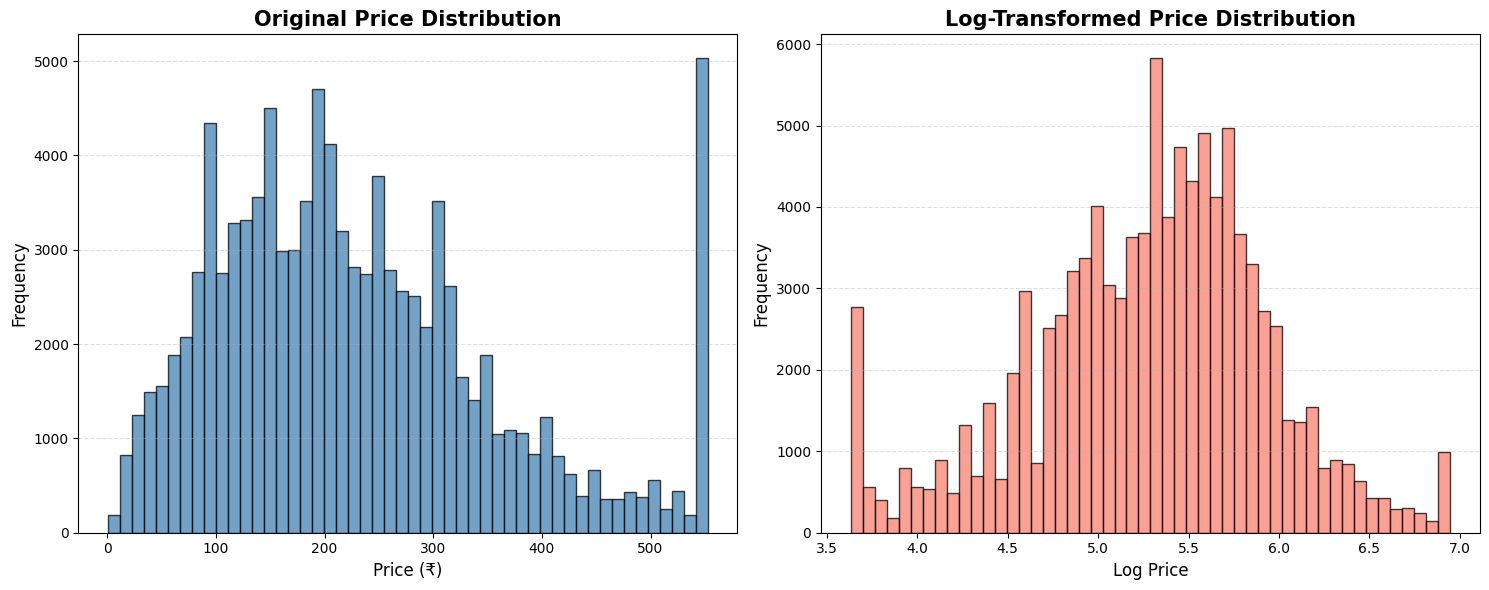

In [61]:
# Create figure with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# ---- Original Price Distribution ----
axes[0].hist(
    df["Prices"],
    bins=50,
    color="steelblue",
    alpha=0.75,
    edgecolor="black"
)

axes[0].set_title("Original Price Distribution",
                  fontsize=15, fontweight="bold")

axes[0].set_xlabel("Price (₹)", fontsize=12)
axes[0].set_ylabel("Frequency", fontsize=12)
axes[0].grid(axis="y", linestyle="--", alpha=0.4)


# ---- Log Price Distribution ----
axes[1].hist(
    df["Log_Price"],
    bins=50,
    color="salmon",
    alpha=0.75,
    edgecolor="black"
)

axes[1].set_title("Log-Transformed Price Distribution",
                  fontsize=15, fontweight="bold")

axes[1].set_xlabel("Log Price", fontsize=12)
axes[1].set_ylabel("Frequency", fontsize=12)
axes[1].grid(axis="y", linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()


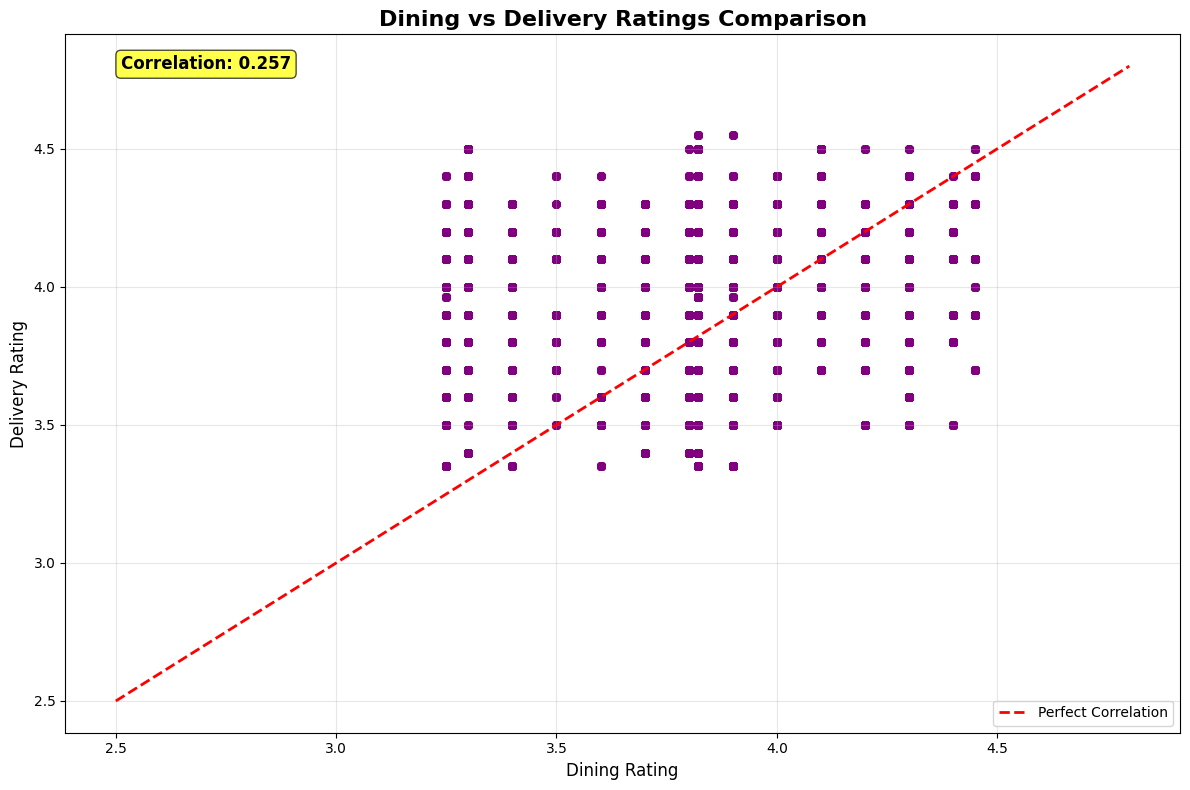

In [62]:
plt.figure(figsize=(12, 8))
plt.scatter(df['Dining_Rating'], df['Delivery_Rating'], alpha=0.5, s=30, color='purple')
plt.plot([2.5, 4.8], [2.5, 4.8], 'r--', linewidth=2, label='Perfect Correlation')
plt.xlabel('Dining Rating', fontsize=12)
plt.ylabel('Delivery Rating', fontsize=12)
plt.title('Dining vs Delivery Ratings Comparison', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()
correlation = df['Dining_Rating'].corr(df['Delivery_Rating'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', transform=plt.gca().transAxes, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7),
         fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

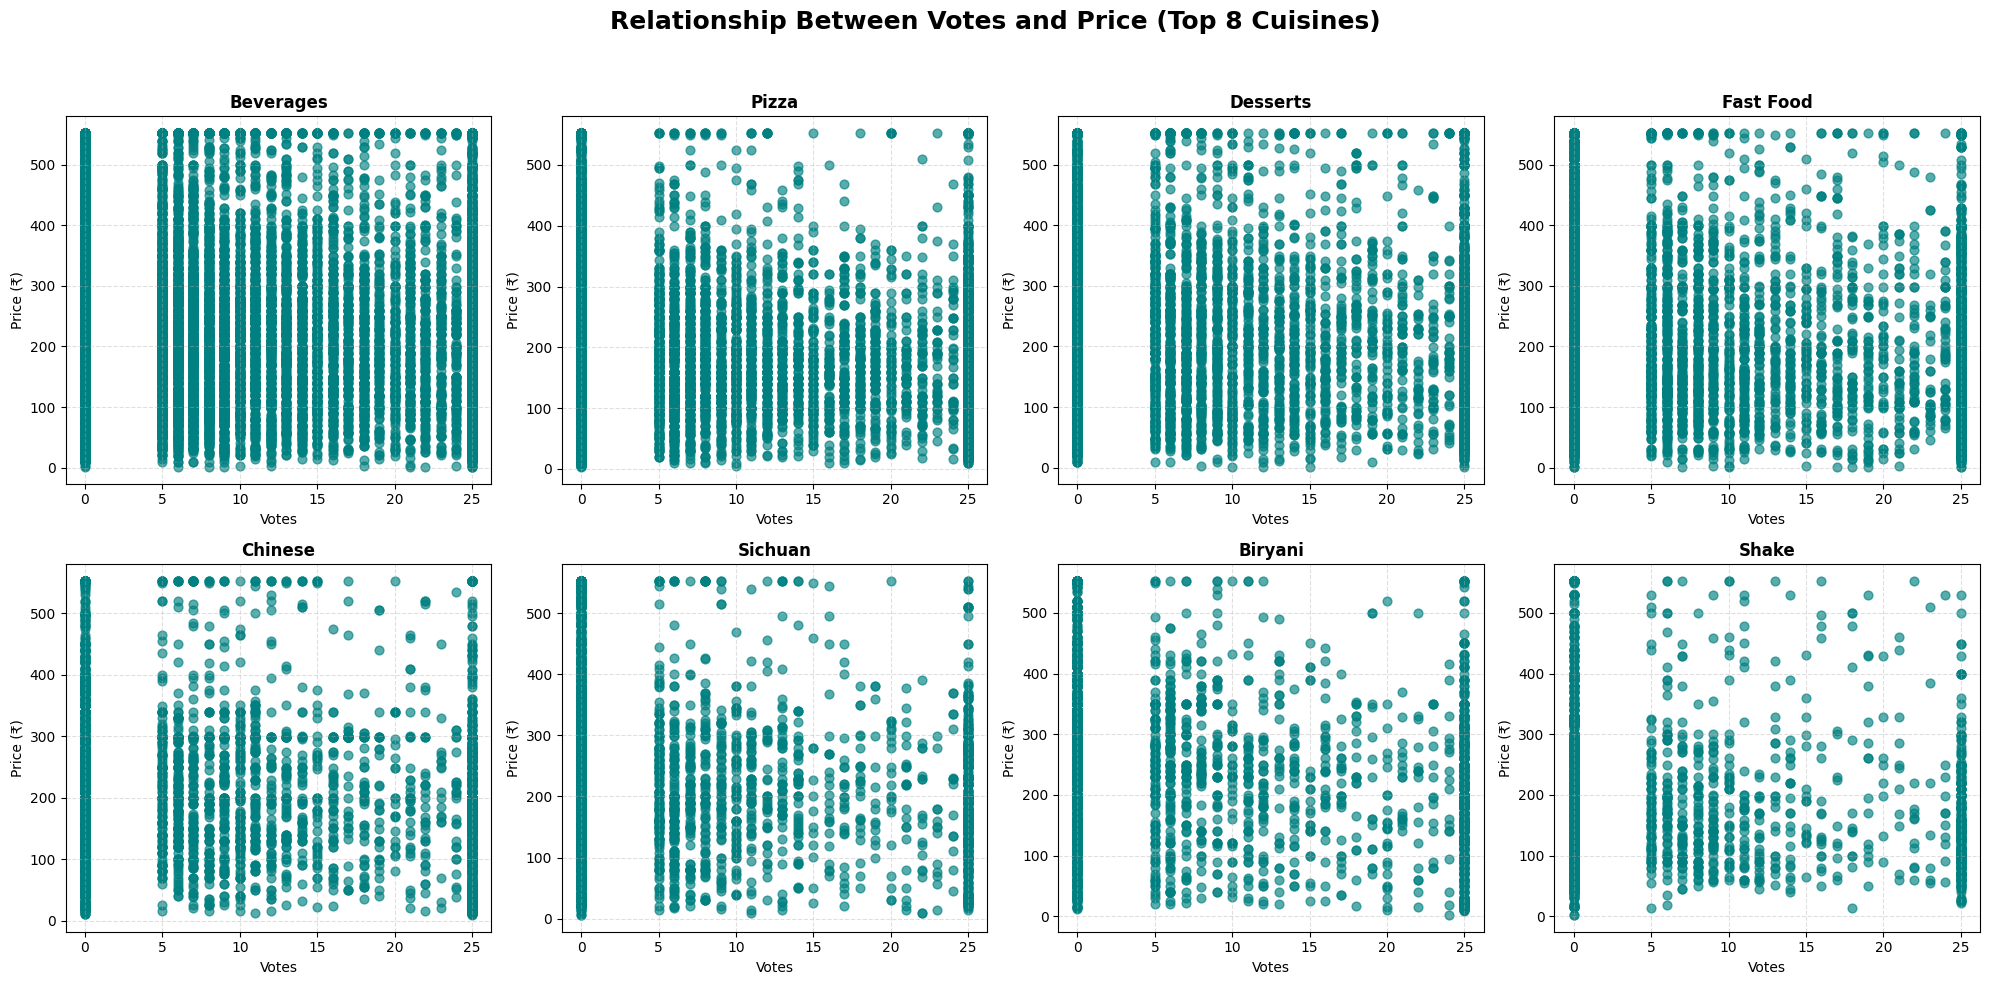

In [63]:
# Identify top 8 cuisines
top_categories = df["Cuisine"].value_counts().nlargest(8).index

# Filter dataset
filtered_df = df[df["Cuisine"].isin(top_categories)]

# Create 2x4 subplot grid
fig, ax_arr = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
ax_list = ax_arr.ravel()

# Plot scatter for each cuisine
for idx, category in enumerate(top_categories):
    
    subset = filtered_df[filtered_df["Cuisine"] == category]
    
    ax_list[idx].scatter(
        subset["Votes"],
        subset["Prices"],
        alpha=0.65,
        s=40,
        color="teal"
    )
    
    ax_list[idx].set_title(category, fontsize=12, fontweight="bold")
    ax_list[idx].set_xlabel("Votes", fontsize=10)
    ax_list[idx].set_ylabel("Price (₹)", fontsize=10)
    ax_list[idx].grid(True, linestyle="--", alpha=0.4)

# Main title
fig.suptitle(
    "Relationship Between Votes and Price (Top 8 Cuisines)",
    fontsize=18,
    fontweight="bold"
)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


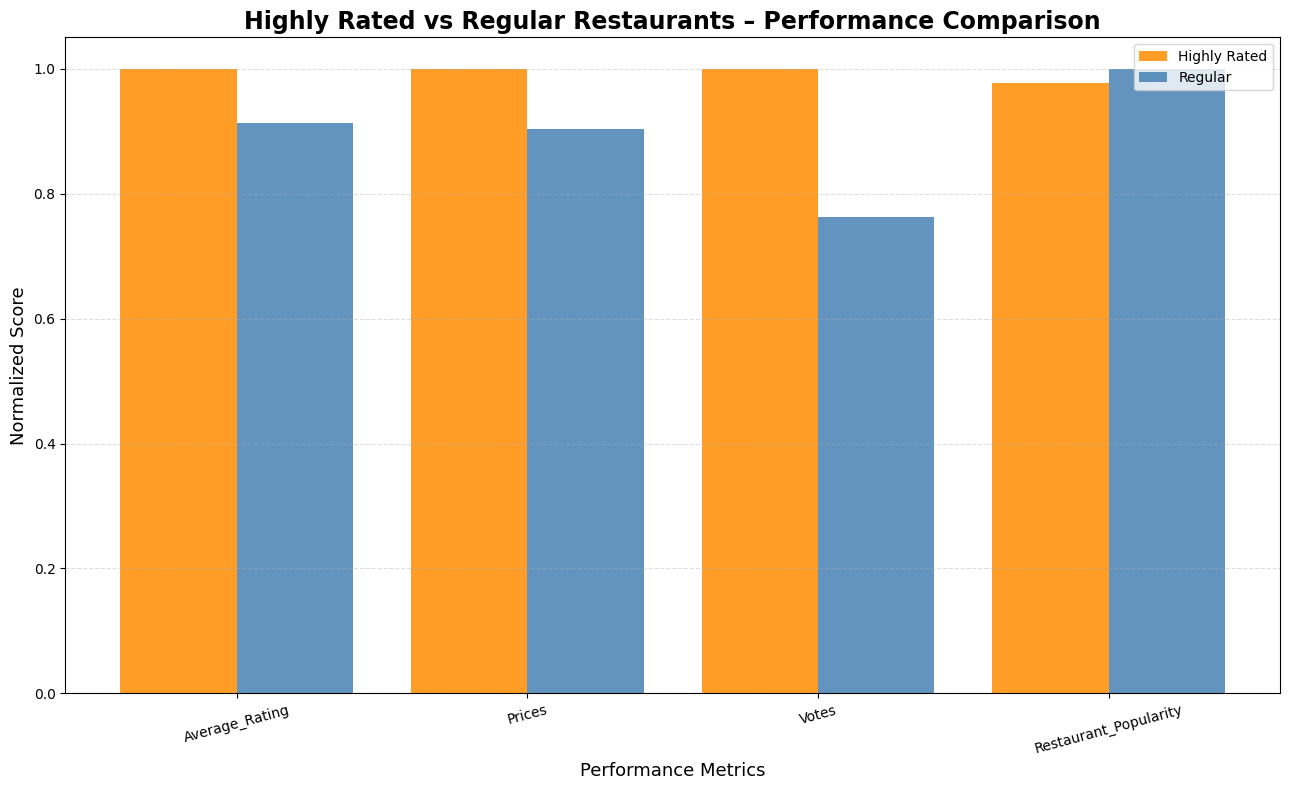

In [66]:
# Aggregate mean metrics by rating category
comparison_df = (
    df.groupby("Is_Highly_Rated")[[
        "Average_Rating",
        "Prices",
        "Votes",
        "Restaurant_Popularity"
    ]]
    .mean()
    .round(2)
)

# Normalize column-wise for fair comparison
normalized_df = comparison_df.div(comparison_df.max())

# Create figure and axis
fig, ax = plt.subplots(figsize=(13, 8))

positions = np.arange(len(normalized_df.columns))
bar_width = 0.4

# Plot bars
ax.bar(
    positions - bar_width/2,
    normalized_df.loc[1],
    width=bar_width,
    label="Highly Rated",
    color="darkorange",
    alpha=0.85
)

ax.bar(
    positions + bar_width/2,
    normalized_df.loc[0],
    width=bar_width,
    label="Regular",
    color="steelblue",
    alpha=0.85
)

# Formatting
ax.set_xlabel("Performance Metrics", fontsize=13)
ax.set_ylabel("Normalized Score", fontsize=13)

ax.set_title(
    "Highly Rated vs Regular Restaurants – Performance Comparison",
    fontsize=17,
    fontweight="bold"
)

ax.set_xticks(positions)
ax.set_xticklabels(normalized_df.columns, rotation=15)

ax.legend()
ax.grid(axis="y", linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()


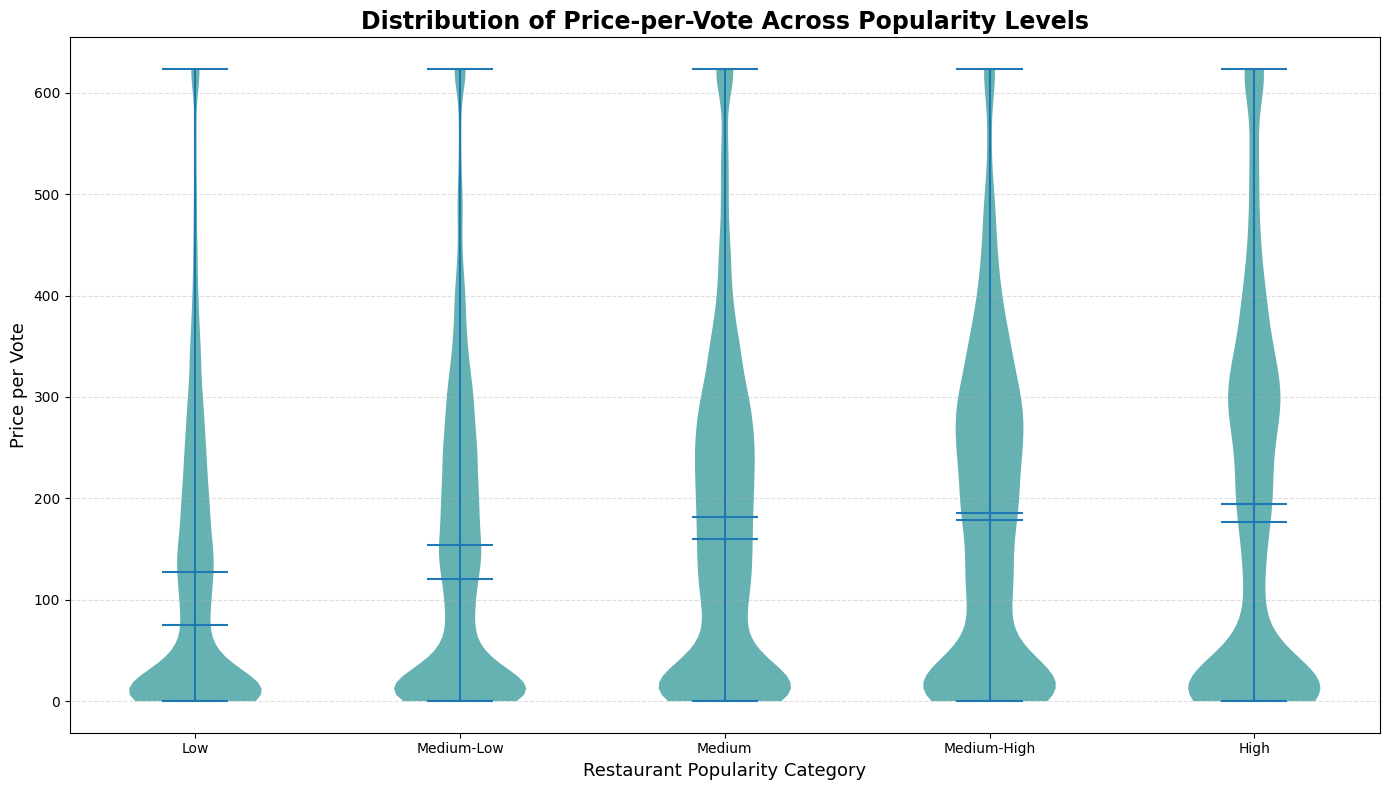

In [67]:
# Create popularity bins
df["Popularity_Level"] = pd.cut(
    df["Restaurant_Popularity"],
    bins=5,
    labels=["Low", "Medium-Low", "Medium", "Medium-High", "High"]
)

# Prepare grouped data
grouped_values = [
    df.loc[df["Popularity_Level"] == level, "Price_per_Vote"].dropna()
    for level in df["Popularity_Level"].cat.categories
]

# Create figure and axis
fig, ax = plt.subplots(figsize=(14, 8))

# Draw violin plot
violin_parts = ax.violinplot(
    grouped_values,
    showmeans=True,
    showmedians=True
)

# Customize appearance
for body in violin_parts["bodies"]:
    body.set_facecolor("teal")
    body.set_alpha(0.6)

# Axis formatting
ax.set_xticks(range(1, 6))
ax.set_xticklabels(df["Popularity_Level"].cat.categories)

ax.set_xlabel("Restaurant Popularity Category", fontsize=13)
ax.set_ylabel("Price per Vote", fontsize=13)

ax.set_title(
    "Distribution of Price-per-Vote Across Popularity Levels",
    fontsize=17,
    fontweight="bold"
)

ax.grid(axis="y", linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()


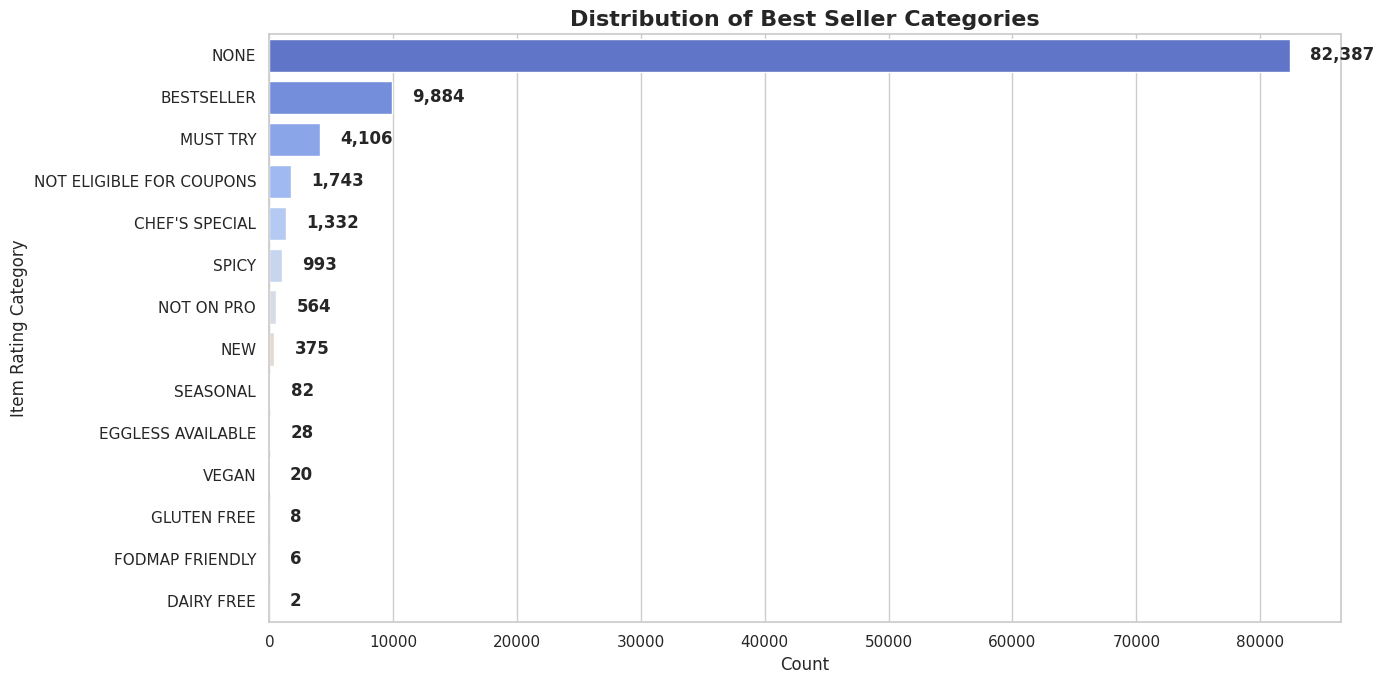

In [73]:
sns.set_theme(style="whitegrid")

# Prepare data
count_data = df["Best_Seller"].value_counts().reset_index()
count_data.columns = ["Best_Seller", "Count"]
fig, axis = plt.subplots(figsize=(14, 7))
sns.barplot(
    data=count_data,
    y="Best_Seller",
    x="Count",
    palette="coolwarm",
    ax=axis
)
axis.set_title("Distribution of Best Seller Categories",
               fontsize=16, fontweight="bold")

axis.set_xlabel("Count")
axis.set_ylabel("Item Rating Category")
# Add labels
for i, v in enumerate(count_data["Count"]):
    axis.text(v + (0.02 * count_data["Count"].max()),
              i,
              f"{v:,}",
              va="center",
              fontweight="bold")
plt.tight_layout()
plt.show()

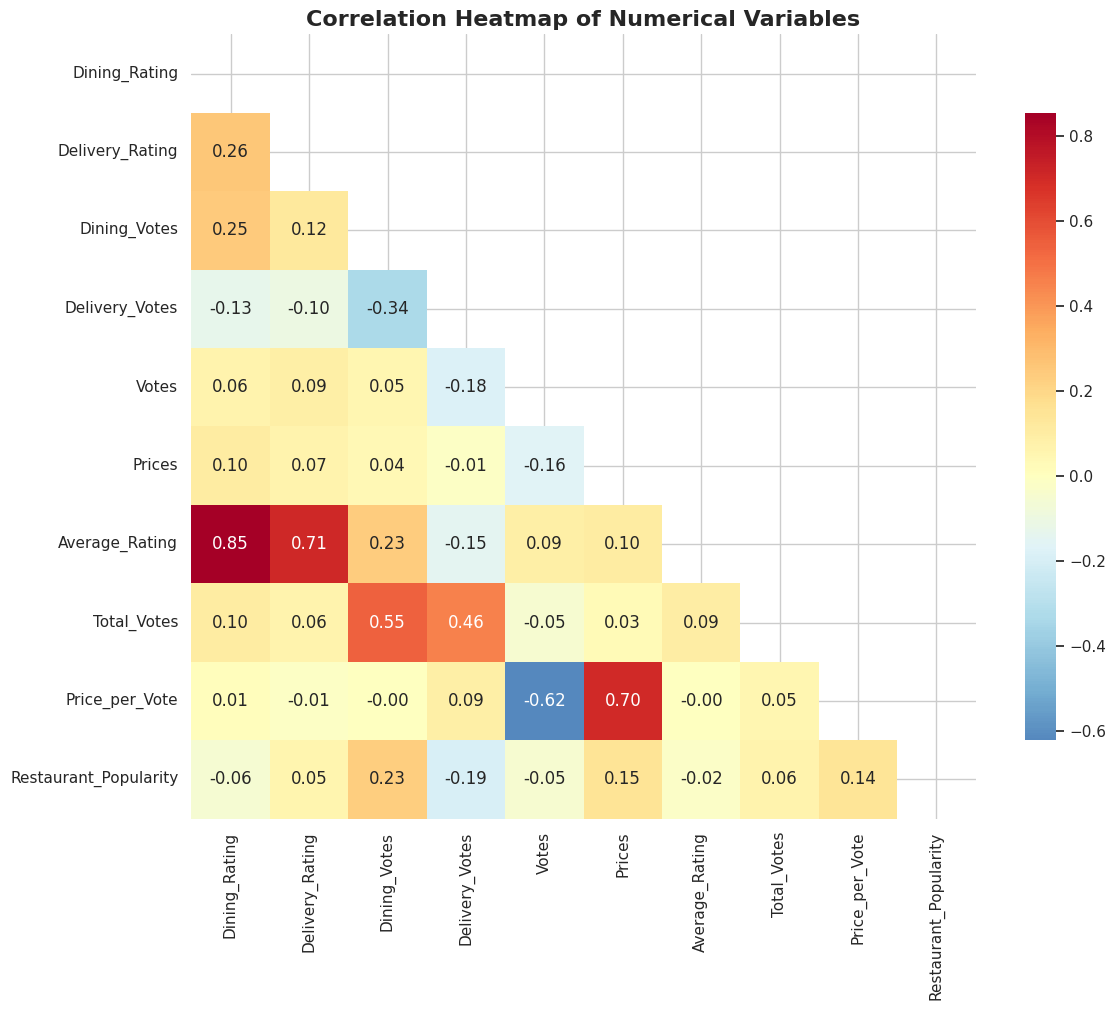

In [74]:
plt.figure(figsize=(12, 10))
numeric_cols = ['Dining_Rating', 'Delivery_Rating', 'Dining_Votes', 'Delivery_Votes', 
                'Votes', 'Prices', 'Average_Rating', 'Total_Votes', 'Price_per_Vote', 
                'Restaurant_Popularity']
correlation_matrix = df[numeric_cols].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
            square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Numerical Variables', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

<Figure size 1600x800 with 0 Axes>

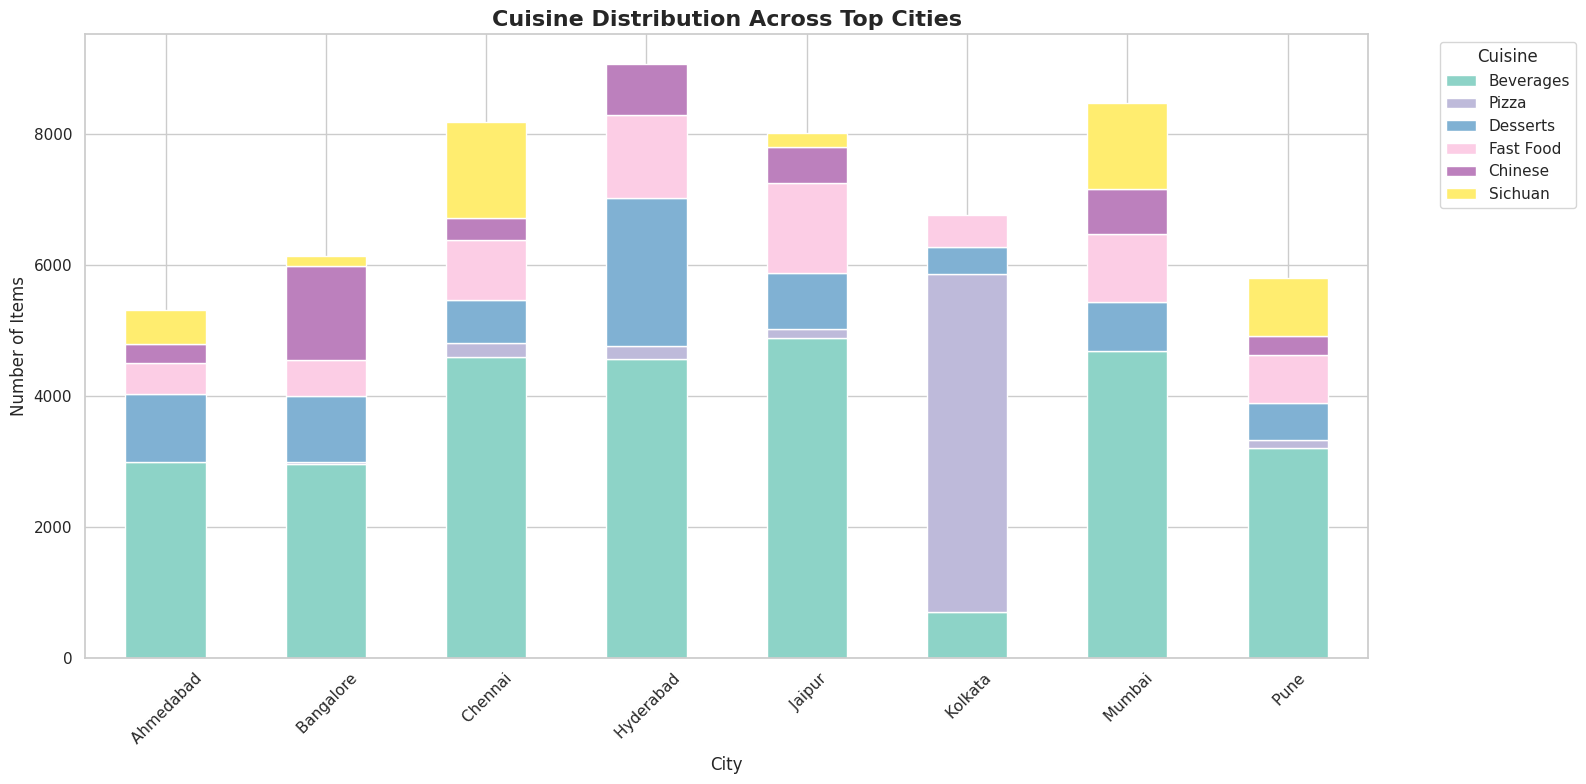

In [75]:
plt.figure(figsize=(16, 8))
top_cities = df['City'].value_counts().head(8).index
top_cuisines = df['Cuisine'].value_counts().head(6).index
cross_tab = pd.crosstab(df[df['City'].isin(top_cities)]['City'], 
                        df[df['City'].isin(top_cities)]['Cuisine'])
cross_tab = cross_tab[top_cuisines]
cross_tab.plot(kind='bar', stacked=True, figsize=(16, 8), colormap='Set3')
plt.title('Cuisine Distribution Across Top Cities', fontsize=16, fontweight='bold')
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Items', fontsize=12)
plt.legend(title='Cuisine', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

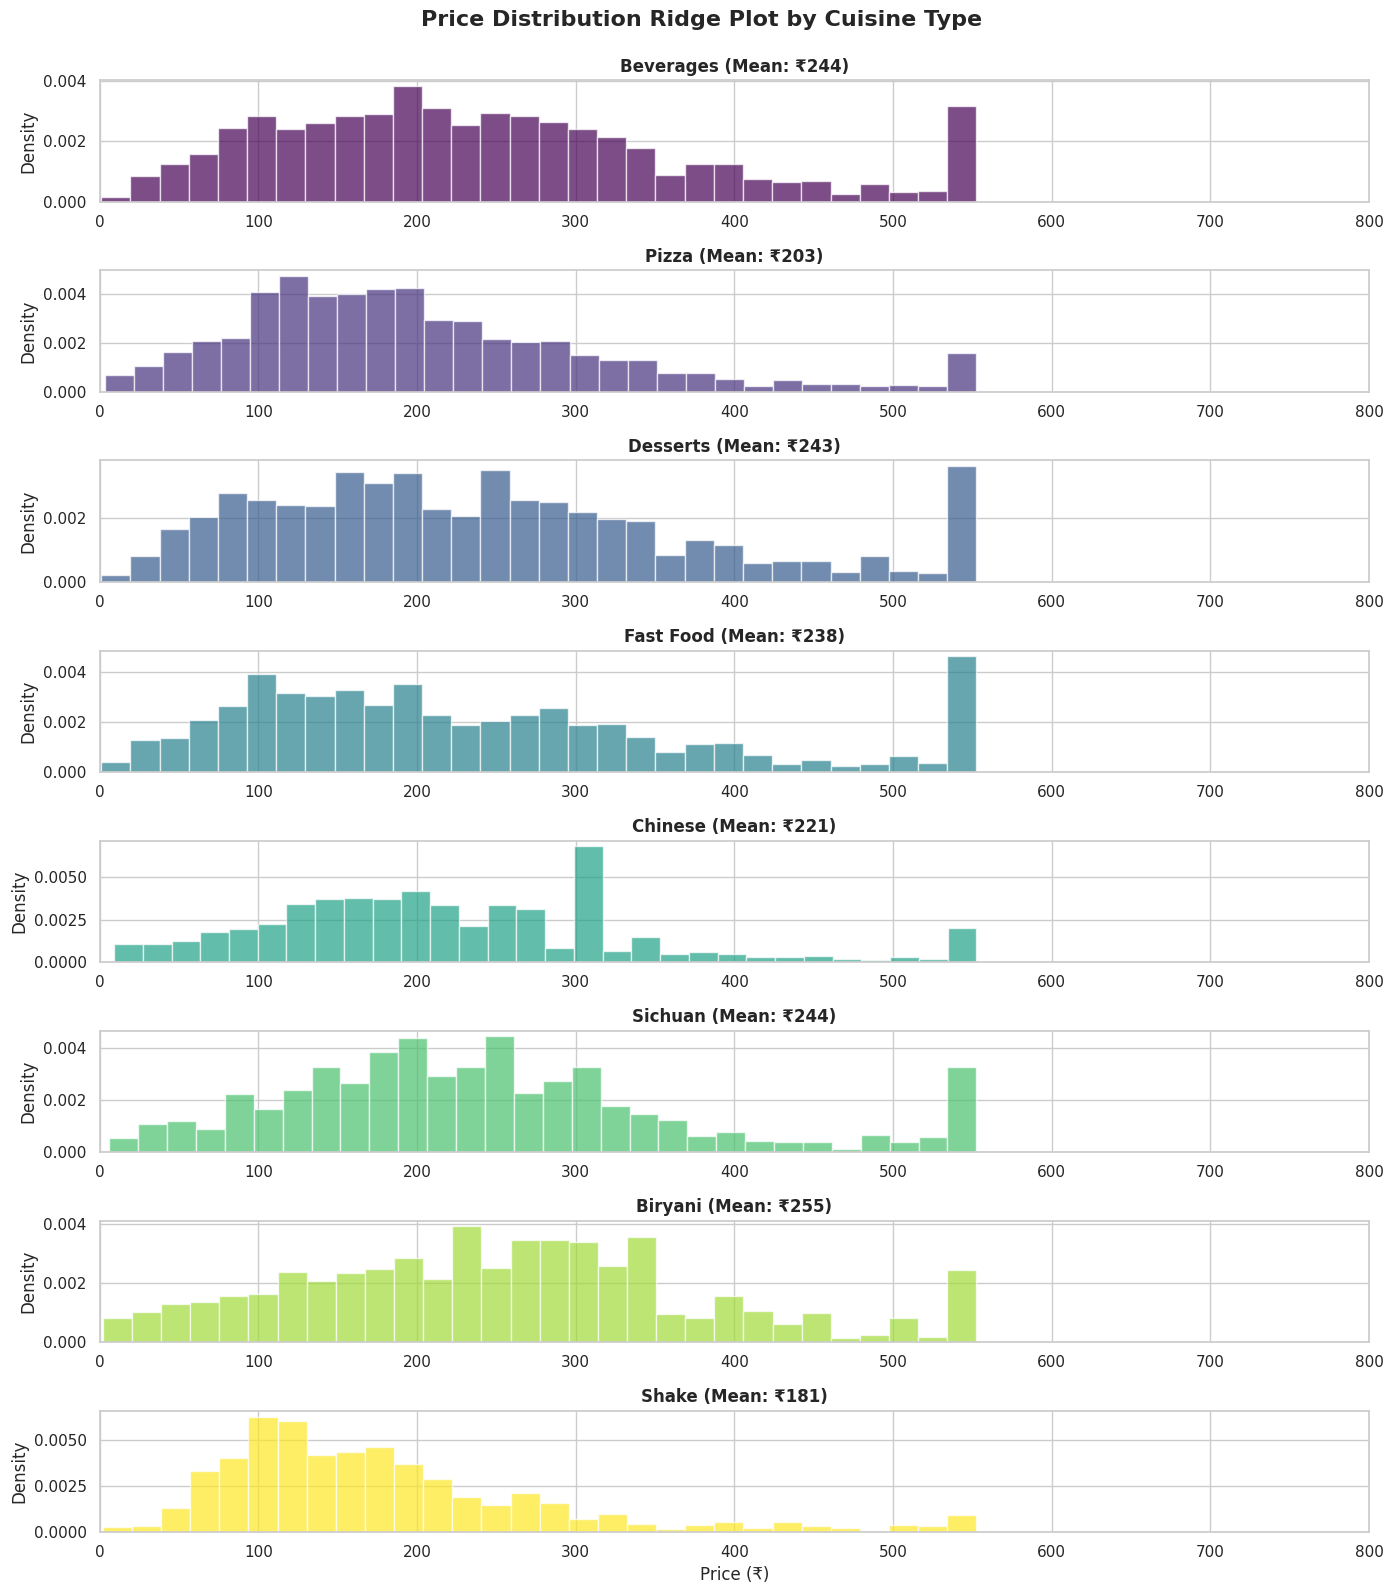

In [76]:
fig, axes = plt.subplots(8, 1, figsize=(14, 16))
top_cuisines = df['Cuisine'].value_counts().head(8).index
colors = plt.cm.viridis(np.linspace(0, 1, 8))

for i, cuisine in enumerate(top_cuisines):
    data = df[df['Cuisine'] == cuisine]['Prices']
    axes[i].hist(data, bins=30, alpha=0.7, color=colors[i], density=True)
    axes[i].set_title(f'{cuisine} (Mean: ₹{data.mean():.0f})', fontsize=12, fontweight='bold')
    axes[i].set_xlim(0, 800)
    axes[i].set_ylabel('Density')
    
axes[-1].set_xlabel('Price (₹)')
plt.suptitle('Price Distribution Ridge Plot by Cuisine Type', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

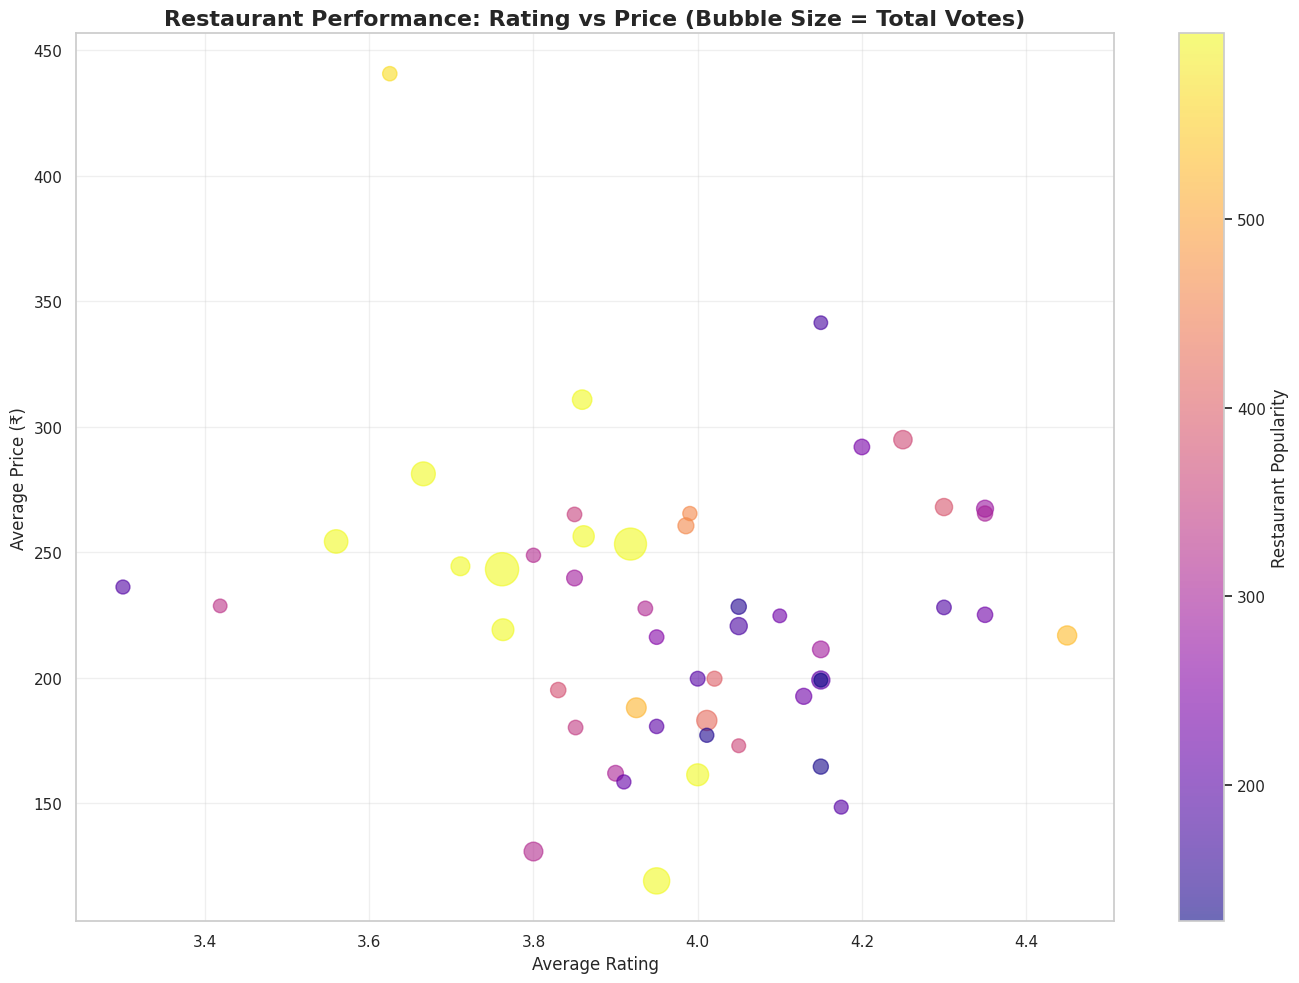

In [77]:
plt.figure(figsize=(14, 10))
restaurant_stats = df.groupby('Restaurant_Name').agg({
    'Average_Rating': 'mean',
    'Prices': 'mean',
    'Votes': 'sum',
    'Restaurant_Popularity': 'first'
}).reset_index()

top_restaurants = restaurant_stats.nlargest(50, 'Votes')
scatter = plt.scatter(top_restaurants['Average_Rating'], top_restaurants['Prices'], 
                     s=top_restaurants['Votes']/20, alpha=0.6, 
                     c=top_restaurants['Restaurant_Popularity'], cmap='plasma')
plt.colorbar(scatter, label='Restaurant Popularity')
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Average Price (₹)', fontsize=12)
plt.title('Restaurant Performance: Rating vs Price (Bubble Size = Total Votes)', 
          fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

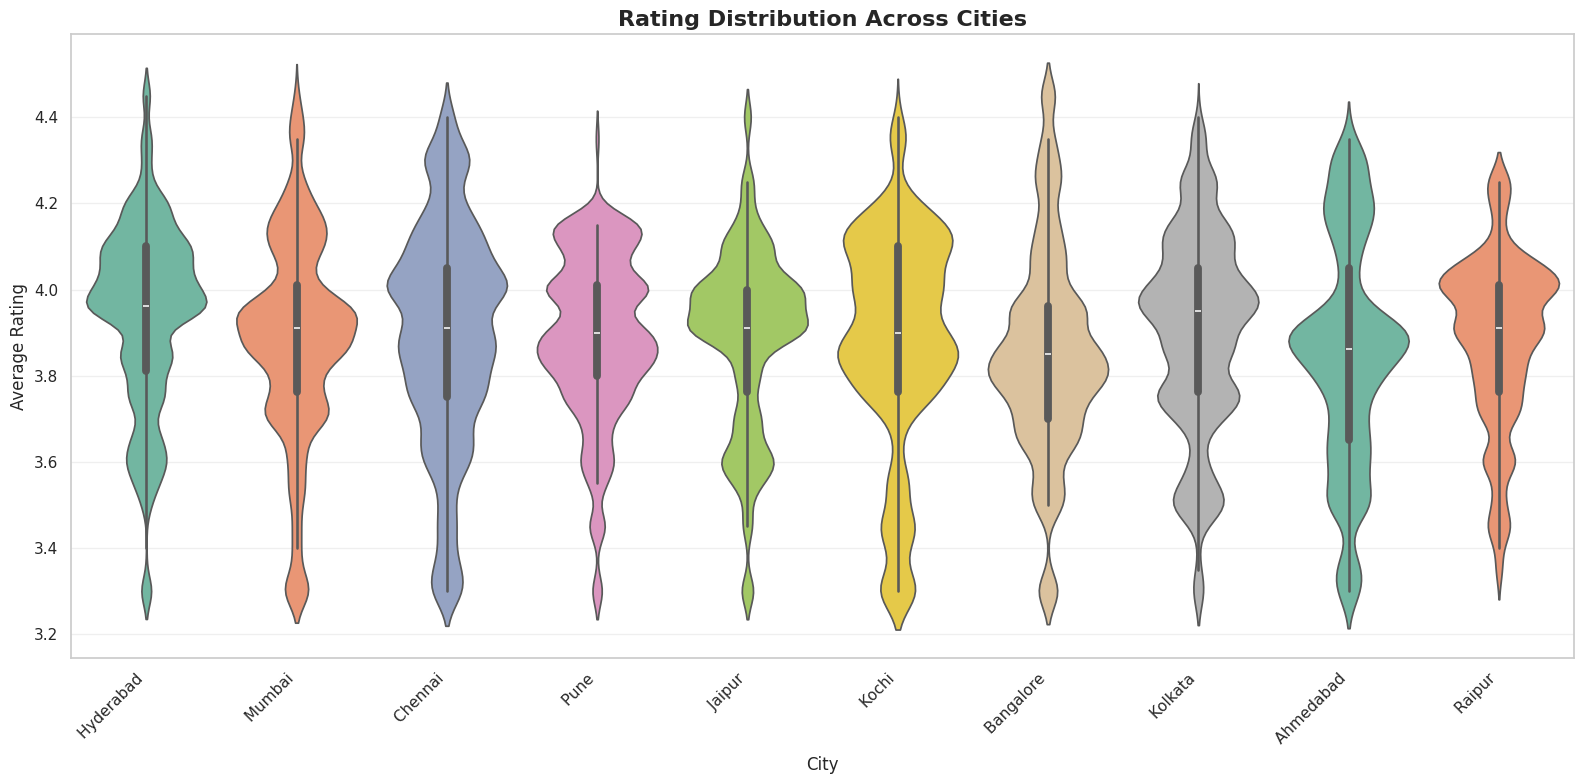

In [78]:
plt.figure(figsize=(16, 8))
top_cities = df['City'].value_counts().head(10).index
city_data = df[df['City'].isin(top_cities)]
sns.violinplot(data=city_data, x='City', y='Average_Rating', palette='Set2')
plt.title('Rating Distribution Across Cities', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.xlabel('City', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

<Figure size 1600x800 with 0 Axes>

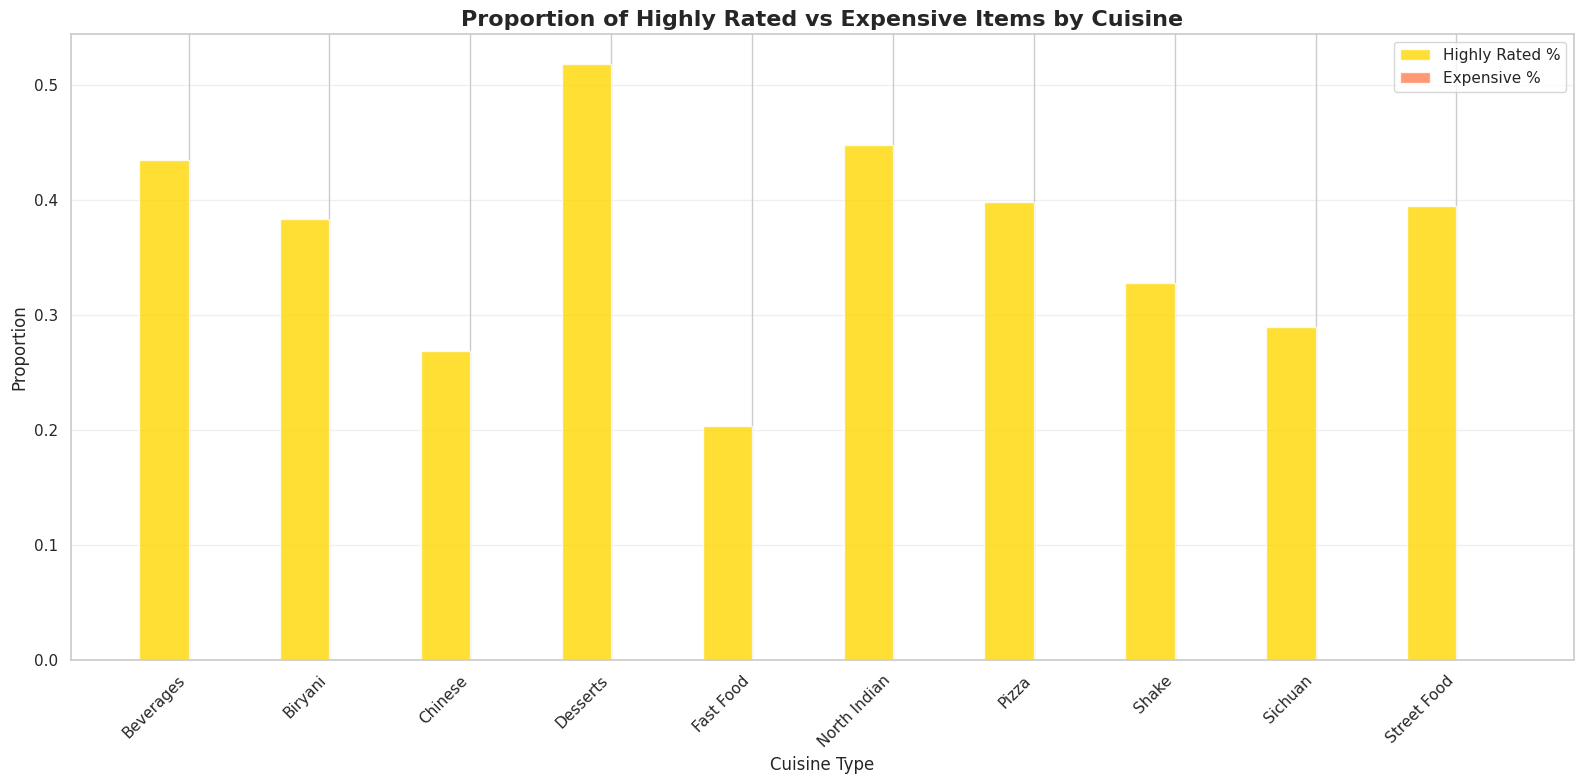

In [80]:
plt.figure(figsize=(16, 8))
top_cuisines = df['Cuisine'].value_counts().head(10).index
cuisine_analysis = df[df['Cuisine'].isin(top_cuisines)].groupby('Cuisine').agg({
    'Is_Highly_Rated': 'mean',
    'Is_Expensive': 'mean'
}).reset_index()

x = np.arange(len(cuisine_analysis))
width = 0.35

fig, ax = plt.subplots(figsize=(16, 8))
bars1 = ax.bar(x - width/2, cuisine_analysis['Is_Highly_Rated'], width, 
               label='Highly Rated %', color='gold', alpha=0.8)
bars2 = ax.bar(x + width/2, cuisine_analysis['Is_Expensive'], width, 
               label='Expensive %', color='coral', alpha=0.8)

ax.set_xlabel('Cuisine Type', fontsize=12)
ax.set_ylabel('Proportion', fontsize=12)
ax.set_title('Proportion of Highly Rated vs Expensive Items by Cuisine', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(cuisine_analysis['Cuisine'], rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

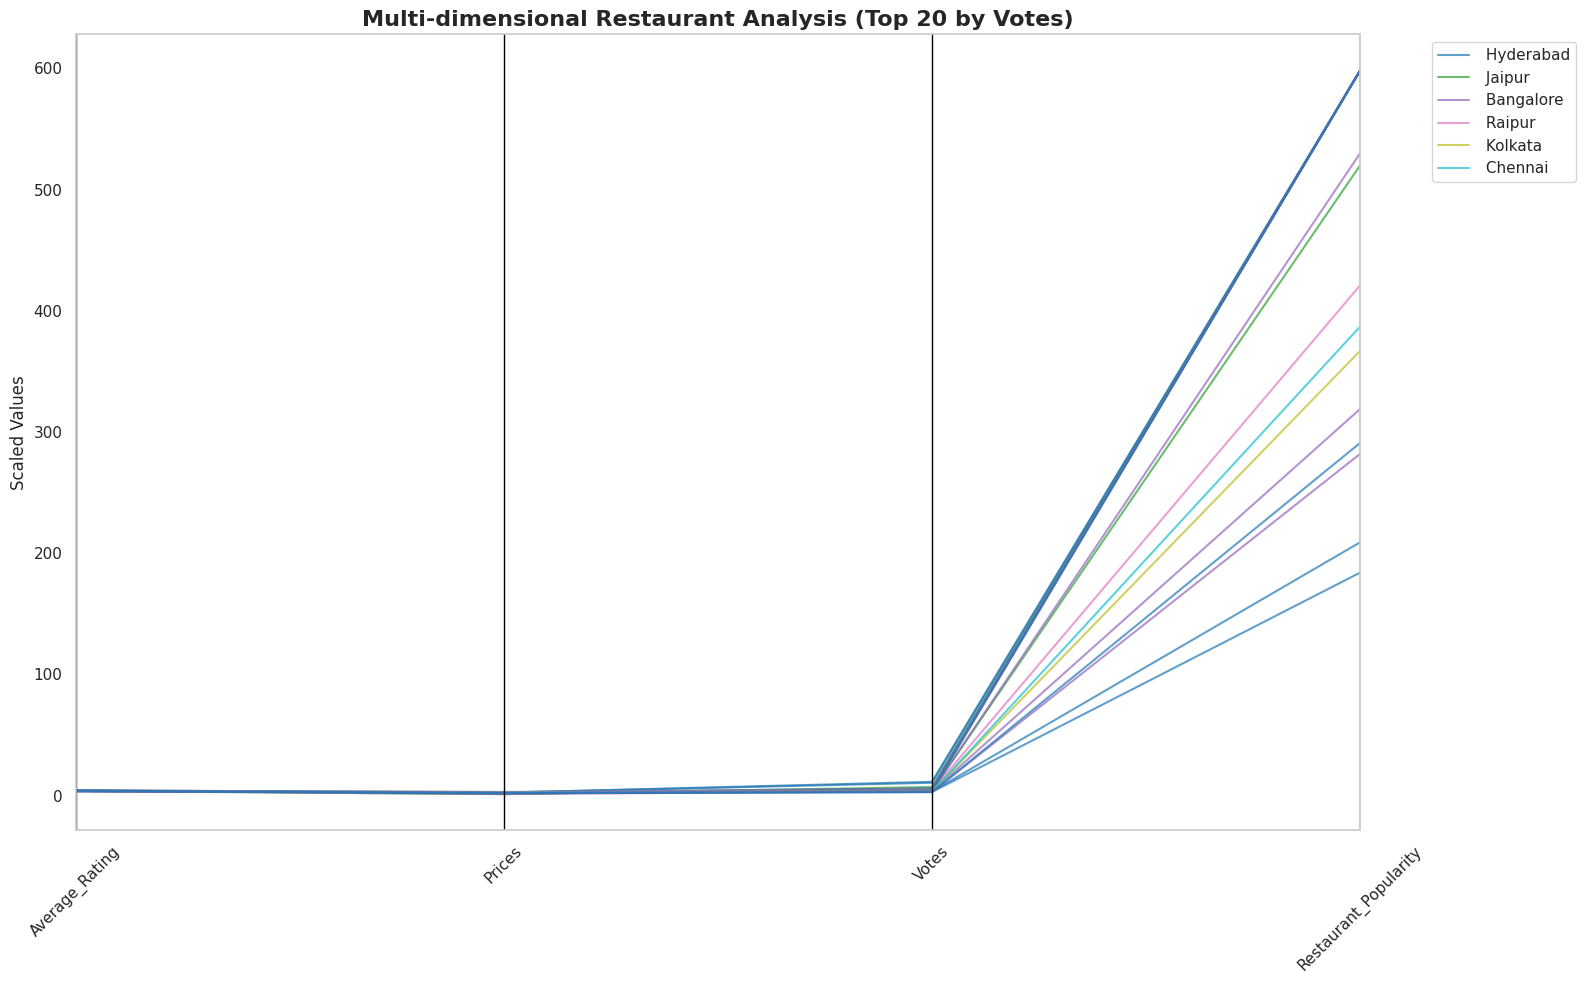

In [81]:
plt.figure(figsize=(16, 10))
restaurant_summary = df.groupby('Restaurant_Name').agg({
    'Average_Rating': 'mean',
    'Prices': 'mean',
    'Votes': 'sum',
    'Restaurant_Popularity': 'first',
    'City': 'first'
}).reset_index()

top_restaurants = restaurant_summary.nlargest(20, 'Votes')
parallel_data = top_restaurants[['Average_Rating', 'Prices', 'Votes', 'Restaurant_Popularity', 'City']]
parallel_data['Prices'] = parallel_data['Prices'] / 100  # Scale for better visualization
parallel_data['Votes'] = parallel_data['Votes'] / 1000   # Scale for better visualization

parallel_coordinates(parallel_data, 'City', colormap='tab10', alpha=0.7)
plt.title('Multi-dimensional Restaurant Analysis (Top 20 by Votes)', fontsize=16, fontweight='bold')
plt.ylabel('Scaled Values', fontsize=12)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

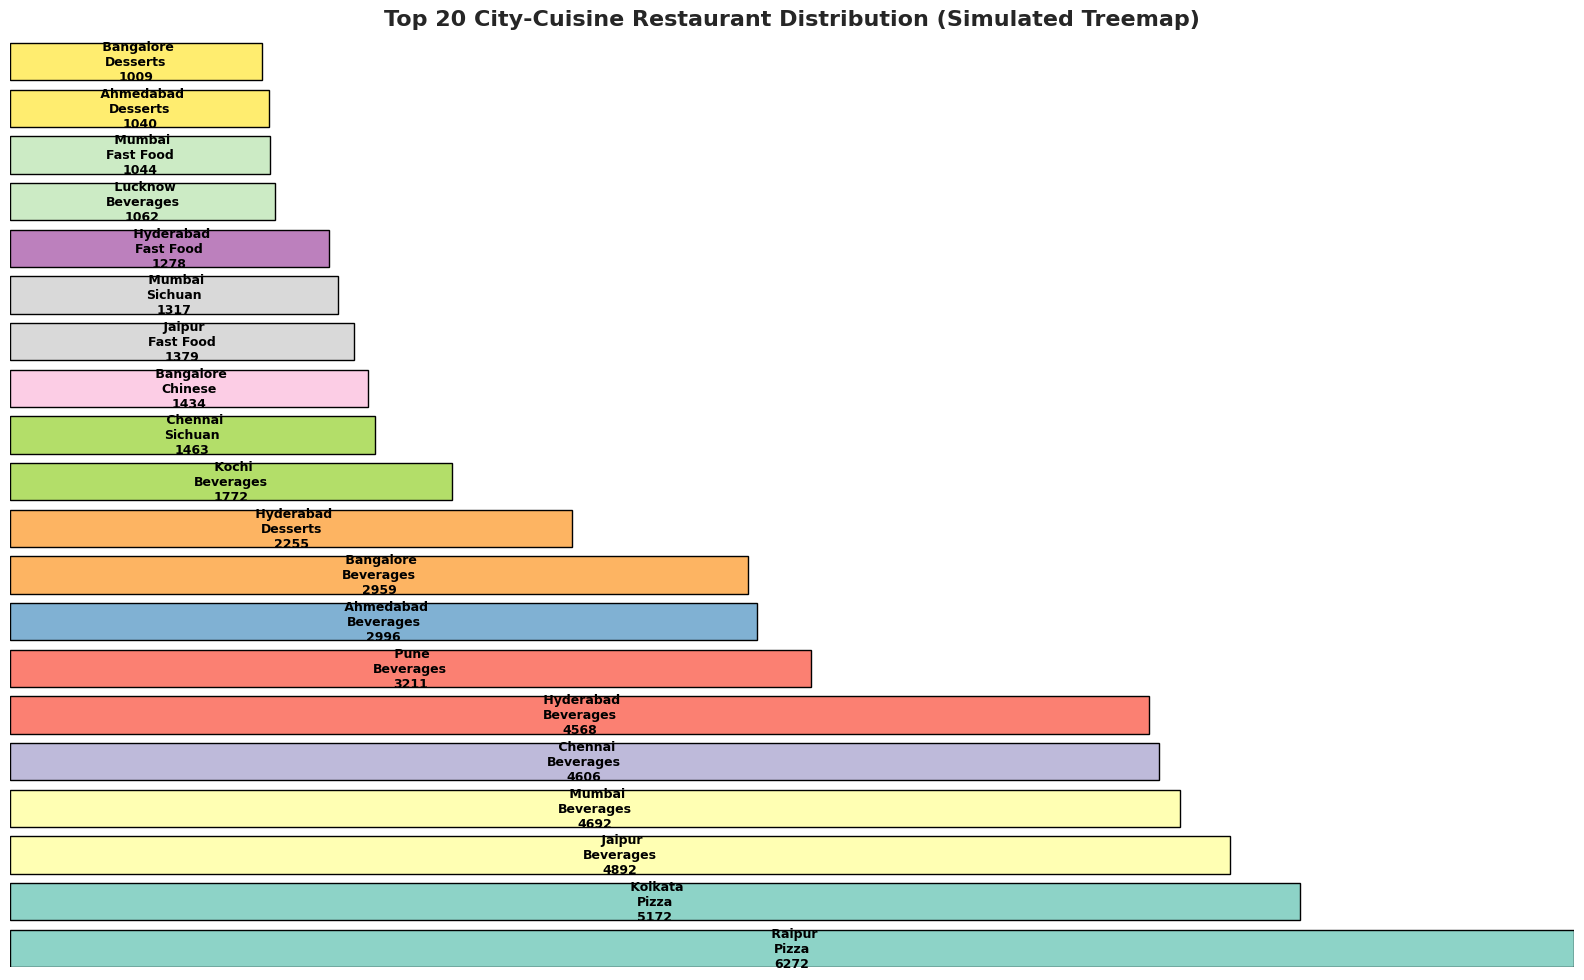

In [82]:
#Group and get top 20 combinations
city_cuisine_counts = df.groupby(['City', 'Cuisine']).size().reset_index(name='count')
top_combinations = city_cuisine_counts.nlargest(20, 'count')

# Plot setup
fig, ax = plt.subplots(figsize=(16, 10))
ax.set_title('Top 20 City-Cuisine Restaurant Distribution (Simulated Treemap)', fontsize=16, fontweight='bold')

# Colors
colors = cm.Set3(np.linspace(0, 1, len(top_combinations)))

# Layout settings
y_pos = 0
max_width = top_combinations['count'].max()

# Loop using range instead of iterrows()
for idx in range(len(top_combinations)):
    row = top_combinations.iloc[idx]  # Access by position
    width = row['count'] / max_width * 100  # Normalize width
    height = 4
    
    rect = patches.Rectangle((0, y_pos), width, height, 
                             facecolor=colors[idx], edgecolor='black', linewidth=1)
    ax.add_patch(rect)
    
    ax.text(width / 2, y_pos + height / 2, 
            f"{row['City']}\n{row['Cuisine']}\n{row['count']}", 
            ha='center', va='center', fontsize=9, fontweight='bold', color='black')
    
    y_pos += height + 1

ax.set_xlim(0, 100)
ax.set_ylim(0, y_pos)
ax.axis('off')
plt.tight_layout()
plt.show()

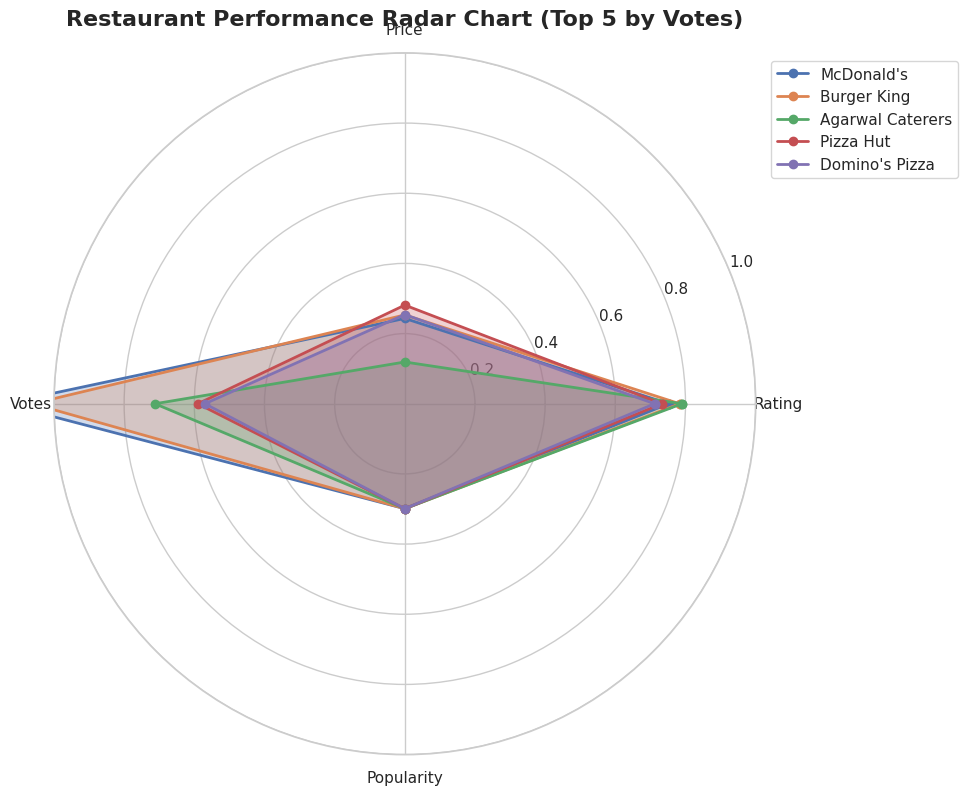

In [83]:
restaurant_metrics = df.groupby('Restaurant_Name').agg({
    'Average_Rating': 'mean',
    'Prices': 'mean',
    'Votes': 'sum',
    'Restaurant_Popularity': 'first'
}).reset_index()

top_5_restaurants = restaurant_metrics.nlargest(5, 'Votes')
categories = ['Rating', 'Price', 'Votes', 'Popularity']

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

for i, (_, restaurant) in enumerate(top_5_restaurants.iterrows()):
    values = [
        restaurant['Average_Rating'] / 5,
        restaurant['Prices'] / 1000,
        restaurant['Votes'] / 10000,
        restaurant['Restaurant_Popularity'] / 2000
    ]
    values += values[:1]
    
    ax.plot(angles, values, 'o-', linewidth=2, label=restaurant['Restaurant_Name'])
    ax.fill(angles, values, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_ylim(0, 1)
plt.title('Restaurant Performance Radar Chart (Top 5 by Votes)', 
          fontsize=16, fontweight='bold', pad=20)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
plt.tight_layout()
plt.show()

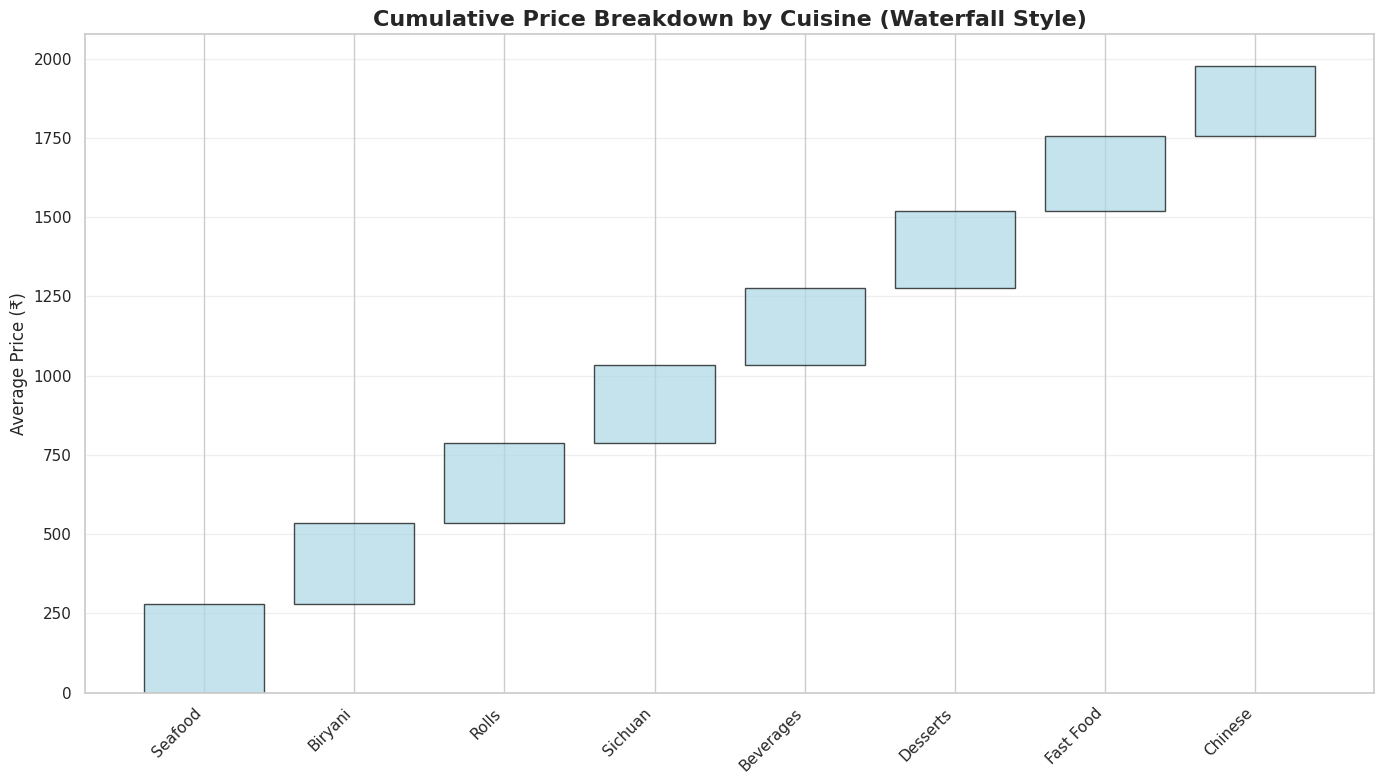

In [84]:
plt.figure(figsize=(14, 8))
price_stats = df.groupby('Cuisine')['Prices'].agg(['mean', 'count']).reset_index()
price_stats = price_stats[price_stats['count'] > 1000].sort_values('mean', ascending=False).head(8)

cumulative = 0
positions = []
heights = []
colors = []

for i, row in price_stats.iterrows():
    positions.append(cumulative)
    heights.append(row['mean'])
    colors.append('lightblue' if row['mean'] > 0 else 'lightcoral')
    cumulative += row['mean']

bars = plt.bar(range(len(positions)), heights, bottom=positions, 
               color=colors, alpha=0.7, edgecolor='black')
plt.xticks(range(len(price_stats)), price_stats['Cuisine'], rotation=45, ha='right')
plt.ylabel('Average Price (₹)', fontsize=12)
plt.title('Cumulative Price Breakdown by Cuisine (Waterfall Style)', fontsize=16, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [86]:
print("""
Conclusion
Project Summary

In this project, I performed Exploratory Data Analysis (EDA) on the Zomato restaurant dataset containing 123,657 records across 17 Indian cities. The main objective was to understand market trends, pricing strategies, customer behavior, and performance factors affecting restaurant success.

Through different visualization techniques and statistical analysis, meaningful business insights were extracted from the dataset.

Key Findings
1️⃣ Market Trends

Hyderabad was identified as the dominant city in terms of restaurant presence, especially in beverage offerings.

The dataset included 48 cuisine types, with Beverages being the most common category.

Price distribution showed high variation, ranging from very low-cost items to premium-priced dishes, indicating strong market segmentation.

2️⃣ Performance Relationships

Restaurants with consistent ratings in both dining and delivery tend to perform better overall.

Higher-priced restaurants generally showed better ratings and popularity, suggesting a positive price-quality relationship.

Votes (customer engagement) strongly influenced restaurant popularity and ratings.

3️⃣ Business Insights

A large number of items were categorized as "None" in the bestseller category, indicating potential opportunities for menu optimization and promotion.

Some cities like Jaipur and Chandigarh showed higher pricing concentration, while Hyderabad maintained moderate pricing.

Continental and North Indian cuisines were positioned in the premium segment, whereas beverages remained affordable and high-volume.

Strategic Recommendations
For Restaurant Owners:

Focus on maintaining consistent quality across services.

Optimize menus using bestseller data.

Adjust pricing based on regional demand.

For Market Expansion:

Identify underrepresented cities for new restaurant openings.

Expand food categories in beverage-dominated markets.

Use pricing data strategically to improve positioning.

Final Statement

This project helped me understand how data science techniques can be applied to real-world business problems. The analysis demonstrates how data-driven insights can support decision-making in the restaurant industry.

Overall, this EDA provides a strong foundation for further work in predictive modeling, recommendation systems, or market forecasting.""")


Conclusion
Project Summary

In this project, I performed Exploratory Data Analysis (EDA) on the Zomato restaurant dataset containing 123,657 records across 17 Indian cities. The main objective was to understand market trends, pricing strategies, customer behavior, and performance factors affecting restaurant success.

Through different visualization techniques and statistical analysis, meaningful business insights were extracted from the dataset.

Key Findings
1️⃣ Market Trends

Hyderabad was identified as the dominant city in terms of restaurant presence, especially in beverage offerings.

The dataset included 48 cuisine types, with Beverages being the most common category.

Price distribution showed high variation, ranging from very low-cost items to premium-priced dishes, indicating strong market segmentation.

2️⃣ Performance Relationships

Restaurants with consistent ratings in both dining and delivery tend to perform better overall.

Higher-priced restaurants generally showed be